**Master thesis visualizations - Florian Spire**

# Importing and uploading data

In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md
import datetime as dt
import numpy as np
from pandas.api.types import CategoricalDtype
import io
import copy
import datetime
import glob

In [ ]:
uploaded = files.upload()
!unzip Results.zip

# Individual stats for each algo (size 10 000 except the first one)

In [4]:
df_time_PRAN = pd.read_csv("./results/CHR_PRAN_10000_time.csv")
df_time_PFIFO = pd.read_csv("./results/CHR_PFIFO_10000_time.csv")
df_time_PLRU = pd.read_csv("./results/CHR_PLRU_10000_time.csv")
df_time_PLFU = pd.read_csv("./results/CHR_PLFU_10000_time.csv")
df_time_PLSO = pd.read_csv("./results/CHR_PLSO_10000_time.csv")
df_time_PSSO = pd.read_csv("./results/CHR_PSSO_10000_time.csv")
df_time_PRAN["Time"] = pd.to_datetime(df_time_PRAN["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PFIFO["Time"] = pd.to_datetime(df_time_PFIFO["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PLRU["Time"] = pd.to_datetime(df_time_PLRU["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PLFU["Time"] = pd.to_datetime(df_time_PLFU["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PLSO["Time"] = pd.to_datetime(df_time_PLSO["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PSSO["Time"] = pd.to_datetime(df_time_PSSO["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PRAN["CacheType"] = "RAN"
df_time_PFIFO["CacheType"] = "FIFO"
df_time_PLRU["CacheType"] = "LRU"
df_time_PLFU["CacheType"] = "LFU"
df_time_PLSO["CacheType"] = "LSO"
df_time_PSSO["CacheType"] = "SSO"
df_time_PRAN.index = df_time_PRAN["Time"]
df_time_PFIFO.index = df_time_PFIFO["Time"]
df_time_PLRU.index = df_time_PLRU["Time"]
df_time_PLFU.index = df_time_PLFU["Time"]
df_time_PLSO.index = df_time_PLSO["Time"]
df_time_PSSO.index = df_time_PSSO["Time"]

df_time = pd.concat([df_time_PRAN, df_time_PFIFO, df_time_PLRU, df_time_PLFU, df_time_PLSO, df_time_PSSO])
# Time of day: morning, afternoon, evening, night
df_time['tod'] = pd.cut(pd.to_datetime(df_time.Time).dt.hour,
       bins=[0, 6, 12, 18, 24],
       labels=['Night', 'Morning', 'Afternoon', 'Evening'],
       right=False,
       include_lowest=True)

df2_time = df_time.groupby(['tod', 'CacheType'])['Hit', 'Miss', 'Pass'].sum()
cat_tod = CategoricalDtype(
    ['Morning', 'Afternoon', 'Evening', 'Night'], 
    ordered=True)
cat_cacheType = CategoricalDtype(
    ['RAN', 'FIFO', 'LRU', 'LFU', 'LSO', 'SSO'], 
    ordered=True)


df2_time.index = [df2_time.index.get_level_values(0).astype(cat_tod),df2_time.index.get_level_values(1).astype(cat_cacheType)]
df2_time = df2_time.sort_index()
sns.set_style("darkgrid")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [4]:
df_CHR_RAN = pd.read_csv("./results/CHR_RAN_5000_time.csv")
df_CHR_FIFO = pd.read_csv("./results/CHR_FIFO_5000_time.csv")
df_CHR_LRU = pd.read_csv("./results/CHR_LRU_5000_time.csv")
df_CHR_LFU = pd.read_csv("./results/CHR_LFU_5000_time.csv")
df_CHR_LSO = pd.read_csv("./results/CHR_LSO_5000_time.csv")
df_CHR_SSO = pd.read_csv("./results/CHR_SSO_5000_time.csv")
df_CHR_RAN["Time"] = pd.to_datetime(df_CHR_RAN["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_CHR_FIFO["Time"] = pd.to_datetime(df_CHR_FIFO["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_CHR_LRU["Time"] = pd.to_datetime(df_CHR_LRU["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_CHR_LFU["Time"] = pd.to_datetime(df_CHR_LFU["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_CHR_LSO["Time"] = pd.to_datetime(df_CHR_LSO["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_CHR_SSO["Time"] = pd.to_datetime(df_CHR_SSO["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_CHR_RAN["CacheType"] = "RAN"
df_CHR_FIFO["CacheType"] = "FIFO"
df_CHR_LRU["CacheType"] = "LRU"
df_CHR_LFU["CacheType"] = "LFU"
df_CHR_LSO["CacheType"] = "LSO"
df_CHR_SSO["CacheType"] = "SSO"
df_CHR_RAN.index = df_CHR_RAN["Time"]
df_CHR_FIFO.index = df_CHR_FIFO["Time"]
df_CHR_LRU.index = df_CHR_LRU["Time"]
df_CHR_LFU.index = df_CHR_LFU["Time"]
df_CHR_LSO.index = df_CHR_LSO["Time"]
df_CHR_SSO.index = df_CHR_SSO["Time"]


df_CHR_PRAN = pd.read_csv("./results/CHR_PRAN_5000_time.csv")
df_CHR_PFIFO = pd.read_csv("./results/CHR_PFIFO_5000_time.csv")
df_CHR_PLRU = pd.read_csv("./results/CHR_PLRU_5000_time.csv")
df_CHR_PLFU = pd.read_csv("./results/CHR_PLFU_5000_time.csv")
df_CHR_PLSO = pd.read_csv("./results/CHR_PLSO_5000_time.csv")
df_CHR_PSSO = pd.read_csv("./results/CHR_PSSO_5000_time.csv")
df_CHR_PRAN["Time"] = pd.to_datetime(df_CHR_PRAN["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_CHR_PFIFO["Time"] = pd.to_datetime(df_CHR_PFIFO["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_CHR_PLRU["Time"] = pd.to_datetime(df_CHR_PLRU["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_CHR_PLFU["Time"] = pd.to_datetime(df_CHR_PLFU["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_CHR_PLSO["Time"] = pd.to_datetime(df_CHR_PLSO["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_CHR_PSSO["Time"] = pd.to_datetime(df_CHR_PSSO["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_CHR_PRAN["CacheType"] = "PRAN"
df_CHR_FIFO["CacheType"] = "PFIFO"
df_CHR_PLRU["CacheType"] = "PLRU"
df_CHR_PLFU["CacheType"] = "PLFU"
df_CHR_PLSO["CacheType"] = "PLSO"
df_CHR_PSSO["CacheType"] = "PSSO"
df_CHR_PRAN.index = df_CHR_PRAN["Time"]
df_CHR_PFIFO.index = df_CHR_PFIFO["Time"]
df_CHR_PLRU.index = df_CHR_PLRU["Time"]
df_CHR_PLFU.index = df_CHR_PLFU["Time"]
df_CHR_PLSO.index = df_CHR_PLSO["Time"]
df_CHR_PSSO.index = df_CHR_PSSO["Time"]

In [8]:
def status_progression(df_time, filename="default"):
  fig, ax = plt.subplots(figsize=(25,10))
  sns.lineplot(x="Time", y="Hit", data=df_time.resample('10Min').mean(), label="Hit")
  sns.lineplot(x="Time", y="Miss", data=df_time.resample('10Min').mean(), label="Miss")
  sns.lineplot(x="Time", y="Pass", data=df_time.resample('10Min').mean(), label="Pass")
  ax.xaxis.set_major_formatter(md.DateFormatter('%d-%m-%Y'))
  ax.legend()
  ax.set_title('Evolution of hit, miss and pass answers over time \n '+ filename + ' cache')
  plt.ylabel("Number of requests")
  plt.savefig(filename+"_status_progression.png", bbox_inches = 'tight')
  plt.show()

In [9]:
def CHR_progression(df_time, df_time2, filename="default"):
  fig, ax = plt.subplots(figsize=(25,10))
  sns.lineplot(x="Time", y="CHR", data=df_time.resample('10Min').mean())
  sns.lineplot(x="Time", y="CHR", data=df_time2.resample('10Min').mean())
  ax.set_title('CHR progression (protected vs non protected) over time \n '+ filename + ' cache')
  ax.xaxis.set_major_formatter(md.DateFormatter('%d-%m-%Y'))
  ax.legend(['Protected ' + filename, 'Non protected ' + filename])
  plt.ylabel("CHR [%]")
  plt.savefig(filename+"_CHR_progression.png", bbox_inches = 'tight')
  plt.show()

In [11]:
def tod(df_time, filename="default"):
  df2_time = df_time.drop("CacheType", axis=1)
  df2_time['tod'] = pd.cut(pd.to_datetime(df2_time.Time).dt.hour,
       bins=[0, 6, 12, 18, 24],
       labels=['night', 'morning', 'afternoon', 'evening'],
       right=False,
       include_lowest=True)
  df2_time = df2_time.groupby('tod')['Hit', 'Miss', 'Pass'].sum()
  cat_tod = CategoricalDtype(
    ['morning', 'afternoon', 'evening', 'night'], 
    ordered=True)
  df2_time.index = df2_time.index.astype(cat_tod)
  df2_time.sort_values(['tod'], inplace=True, ascending=True)
  df2_time.plot.bar(stacked=True, title='Cache hit, miss and pass grouped by time of day \n '+ filename + ' cache', figsize=(13,8), xlabel="Time of day", ylabel="Number of requests", color=['Limegreen', 'Salmon', 'Orange'])
  plt.savefig(filename+"_tod.png", bbox_inches = 'tight')
  plt.show()

## For FIFO: size 100 000

In [ ]:
df = pd.read_csv(("./results/CHR_PFIFO_100000_regular.csv"), index_col="Record")
df_time = pd.read_csv("./results/CHR_PFIFO_100000_time.csv")
df_time["Time"] = pd.to_datetime(df_time["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
sns.set_style("darkgrid")

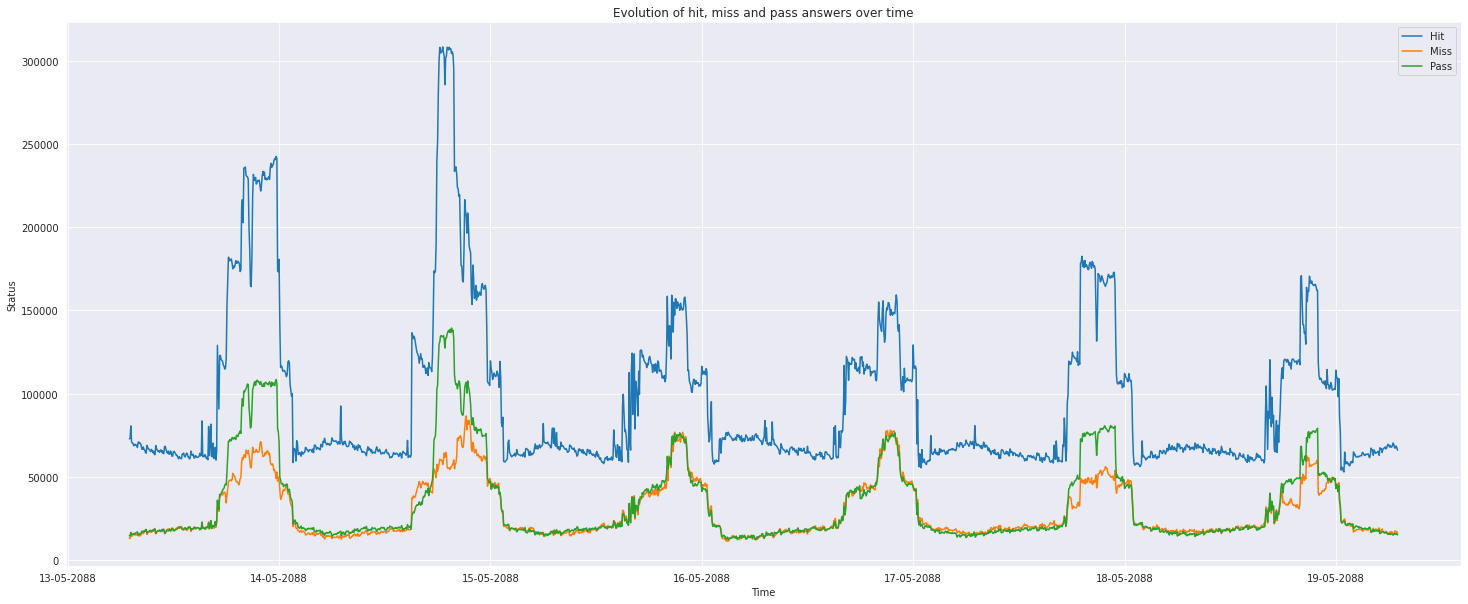

In [ ]:
df_time.index = df_time["Time"]
fig, ax = plt.subplots(figsize=(25,10))
sns.lineplot(x="Time", y="Hit", data=df_time.resample('5Min').mean(), label="Hit")
sns.lineplot(x="Time", y="Miss", data=df_time.resample('5Min').mean(), label="Miss")
sns.lineplot(x="Time", y="Pass", data=df_time.resample('5Min').mean(), label="Pass")
ax.xaxis.set_major_formatter(md.DateFormatter('%d-%m-%Y'))
ax.legend()
ax.set_title('Evolution of hit, miss and pass answers over time')
plt.ylabel("Status")
plt.show()

## RAN

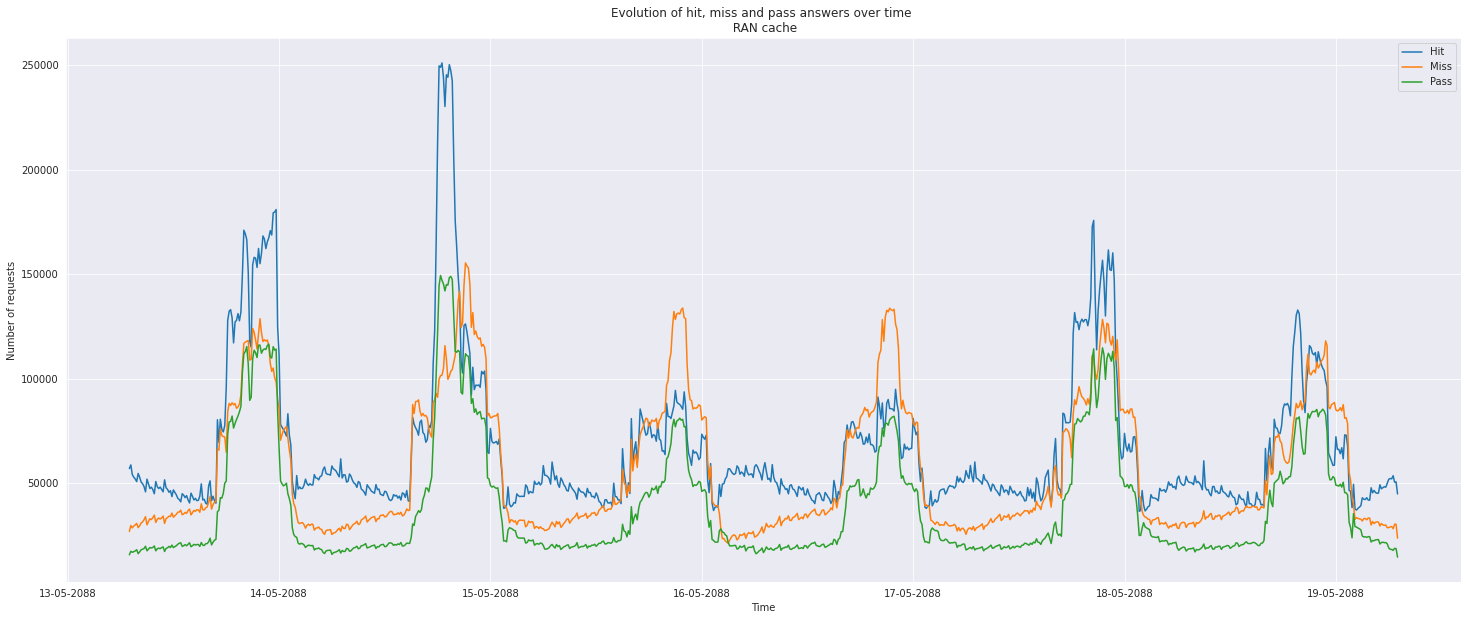

In [12]:
status_progression(df_time_PRAN, filename="RAN")

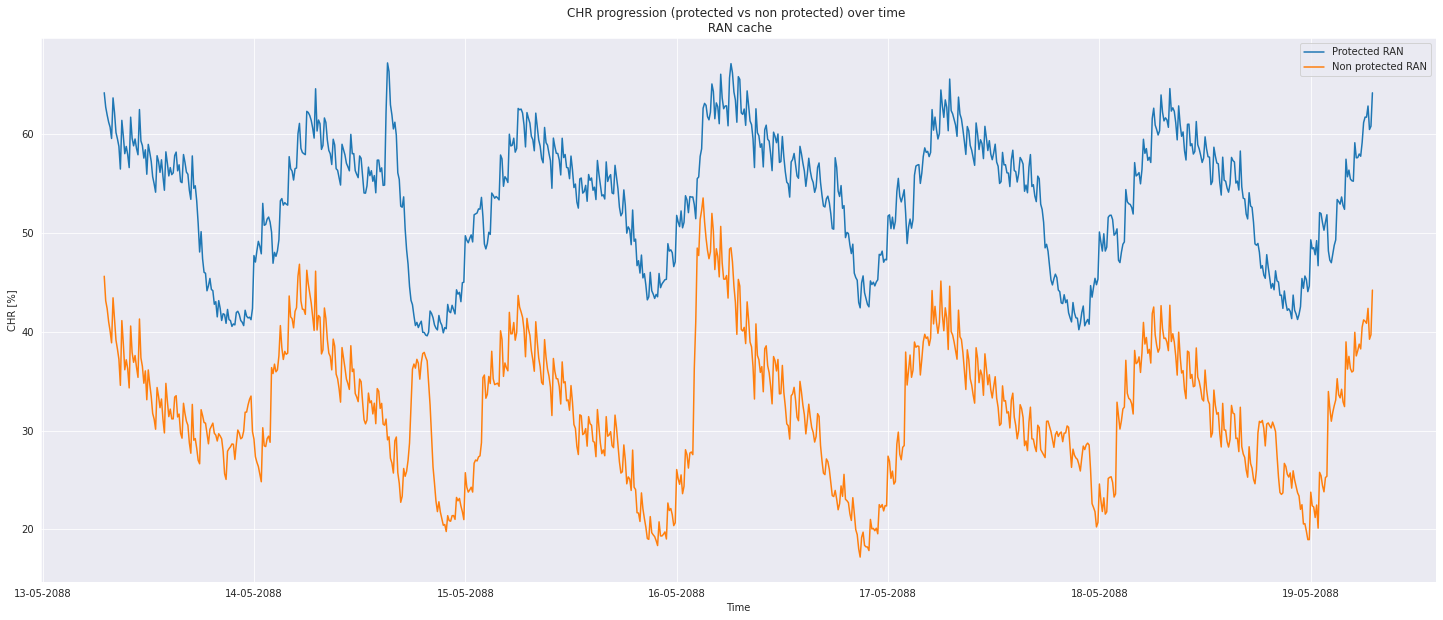

In [13]:
CHR_progression(df_CHR_PRAN, df_CHR_RAN, filename="RAN")

In [ ]:
df_time_PRAN

Time   Total    Hit   Miss   Pass     CHR  \
Time                                                                           
2088-05-13 07:00:11 2088-05-13 07:00:11  100000  57848  26736  15416  57.848   
2088-05-13 07:00:43 2088-05-13 07:00:43  100000  59611  25693  14696  59.611   
2088-05-13 07:01:17 2088-05-13 07:01:17  100000  55269  28565  16166  55.269   
2088-05-13 07:01:54 2088-05-13 07:01:54  100000  53210  29015  17775  53.210   
2088-05-13 07:02:30 2088-05-13 07:02:30  100000  55960  27367  16673  55.960   
...                                 ...     ...    ...    ...    ...     ...   
2088-05-19 06:59:03 2088-05-19 06:59:03  100000  54431  28080  17489  54.431   
2088-05-19 06:59:58 2088-05-19 06:59:58  100000  42970  35387  21643  42.970   
2088-05-19 07:00:40 2088-05-19 07:00:40  100000  54968  27847  17185  54.968   
2088-05-19 07:02:02 2088-05-19 07:02:02  100000  49605  31039  19356  49.605   
2088-05-19 07:02:57 2088-05-19 07:02:57   50692  30355  12593   7744  59.881   

                    CacheType  
Time                           
2088-05-13 07:00:11       RAN  
2088-05-13 07:00:43       RAN  
2088-05-13 07:01:17       RAN  
2088-05-13 07:01:54       RAN  
2088-05-13 07:02:30       RAN  
...                       ...  
2088-05-19 06:59:03       RAN  
2088-05-19 06:59:58       RAN  
2088-05-19 07:00:40       RAN  
2088-05-19 07:02:02       RAN  
2088-05-19 07:02:57       RAN  

[13178 rows x 7 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


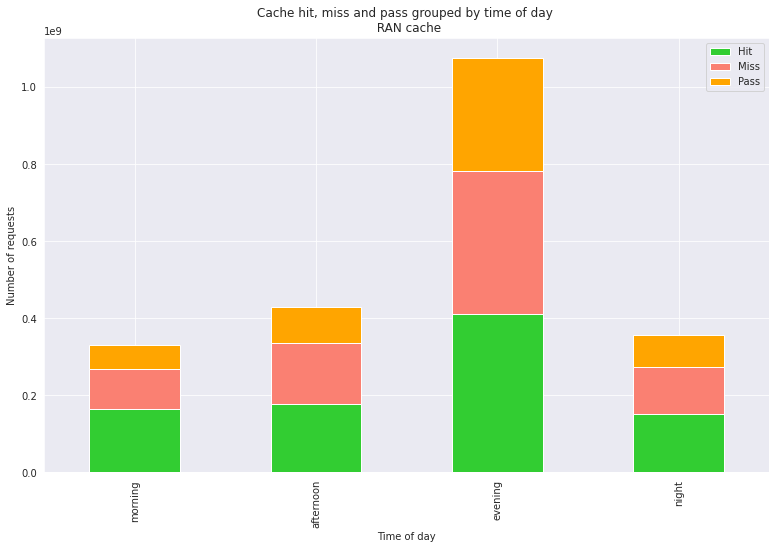

In [14]:
tod(df_time_PRAN, filename="RAN")

## FIFO

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Text(0.5, 1.0, 'Evolution of hit, miss and pass answers')

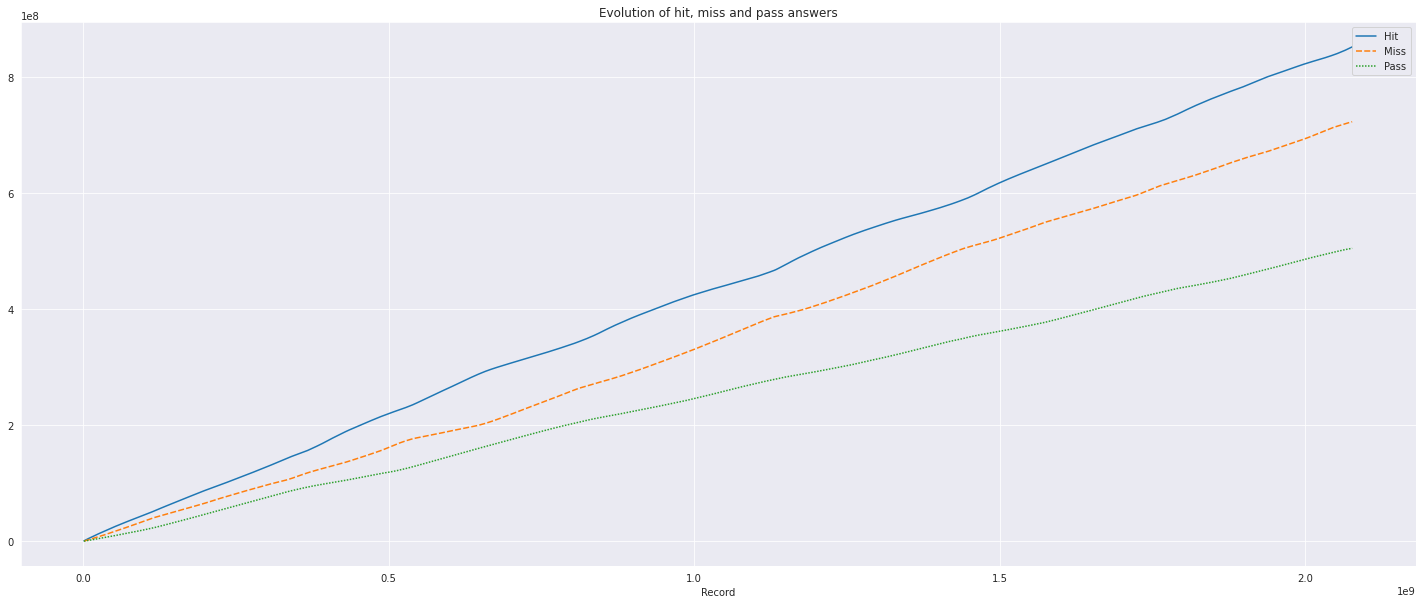

In [ ]:
fig, ax = plt.subplots(figsize=(25,10))
sns.lineplot(data=pd.read_csv(("./results/CHR_PFIFO_10000_regular.csv"), index_col="Record").drop('CHR', 1))
ax.set_title('Evolution of hit, miss and pass answers')

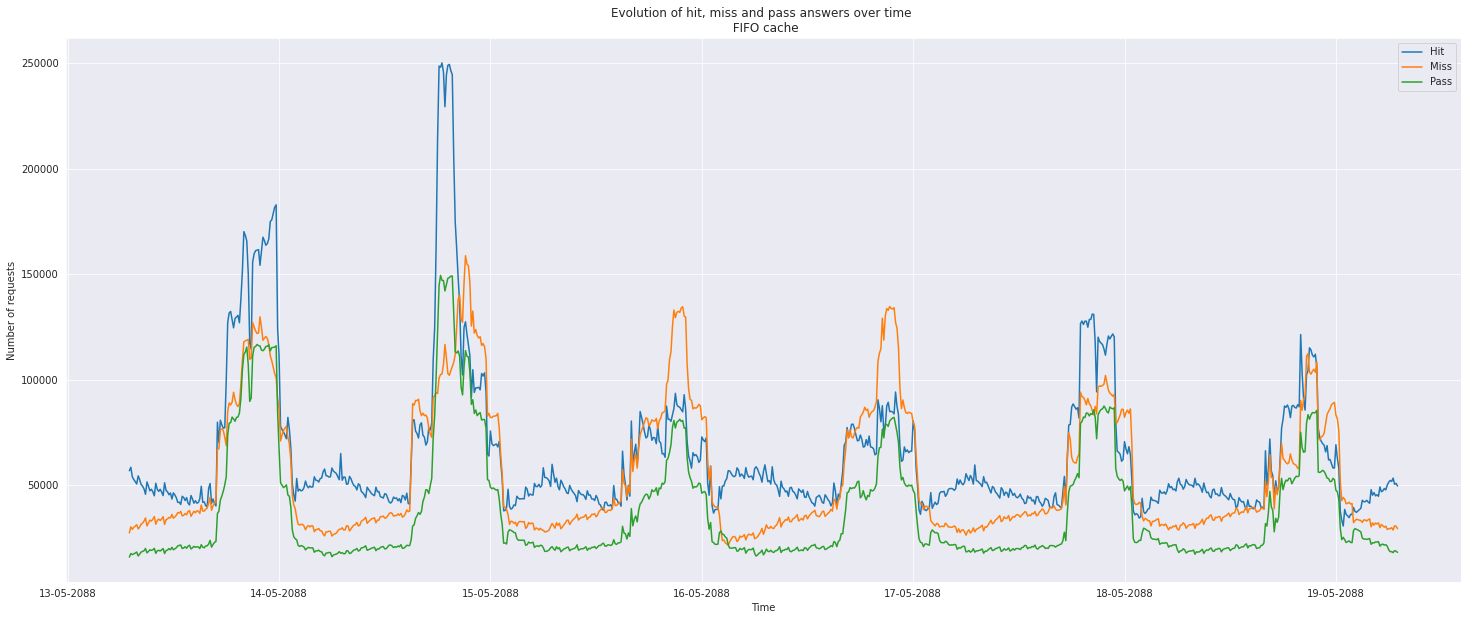

In [15]:
status_progression(df_time_PFIFO, filename="FIFO")

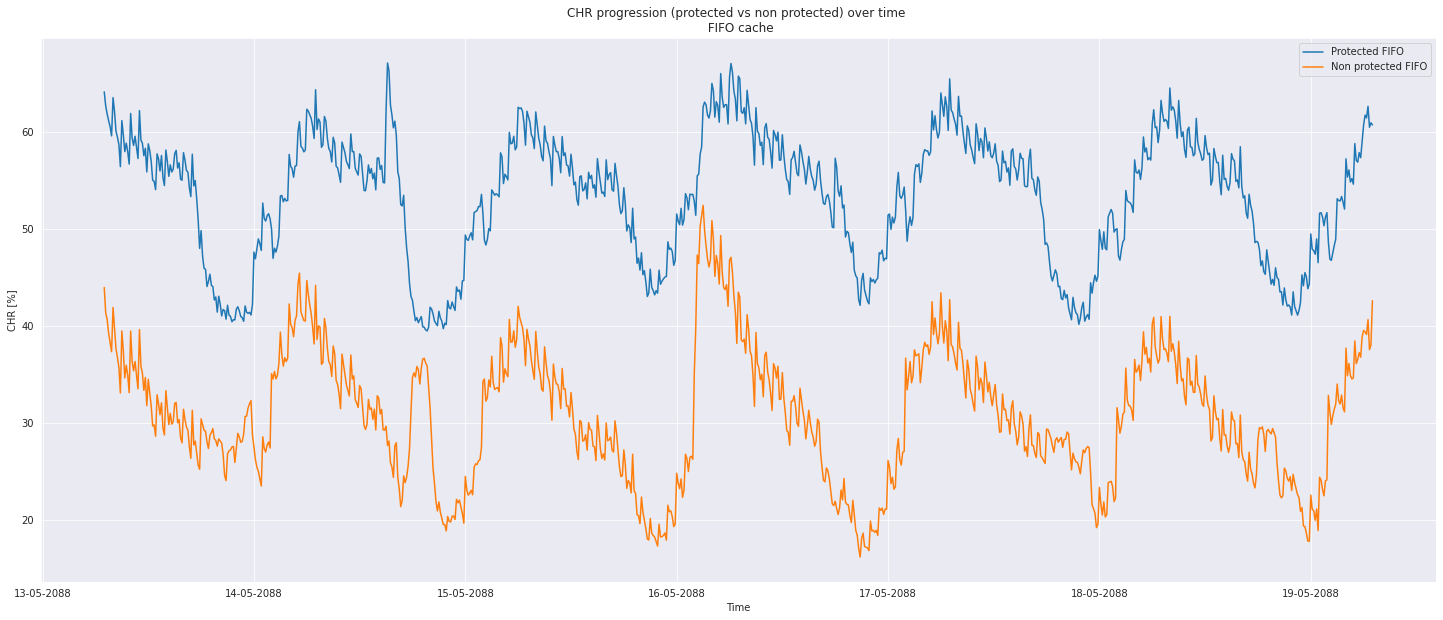

In [16]:
CHR_progression(df_CHR_PFIFO, df_CHR_FIFO, filename="FIFO")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


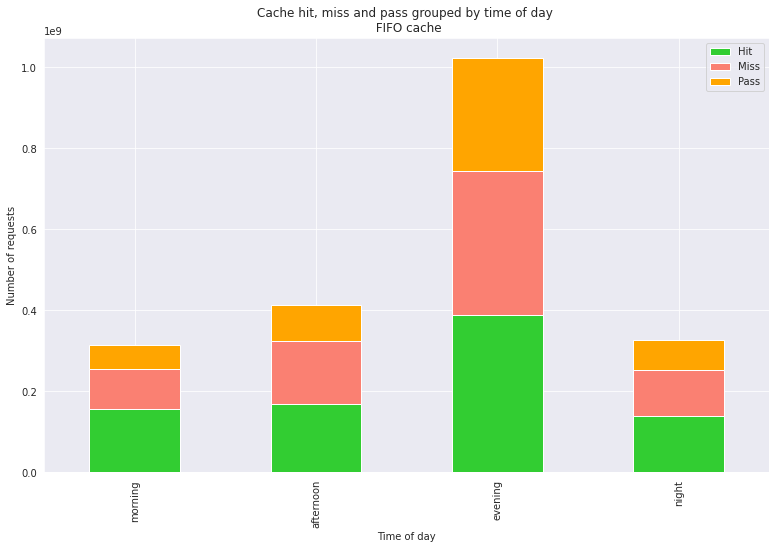

In [17]:
tod(df_time_PFIFO, filename="FIFO")

## LRU

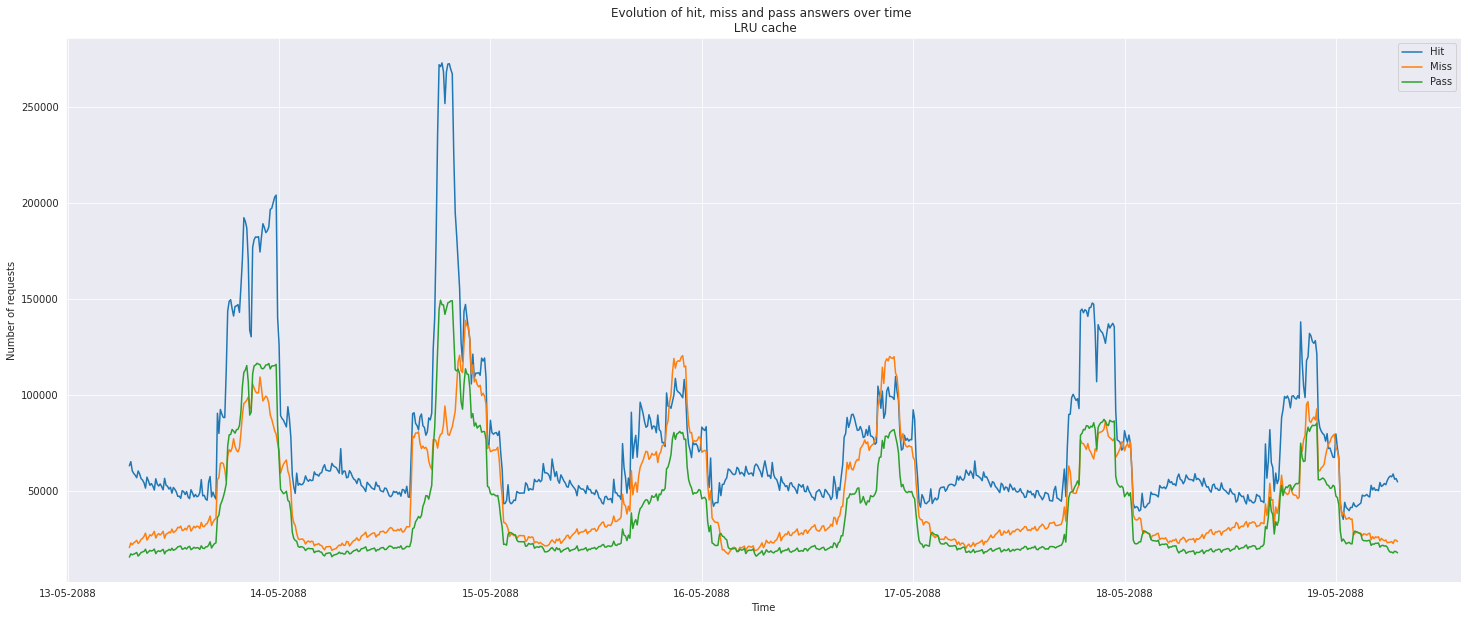

In [18]:
status_progression(df_time_PLRU, filename="LRU")

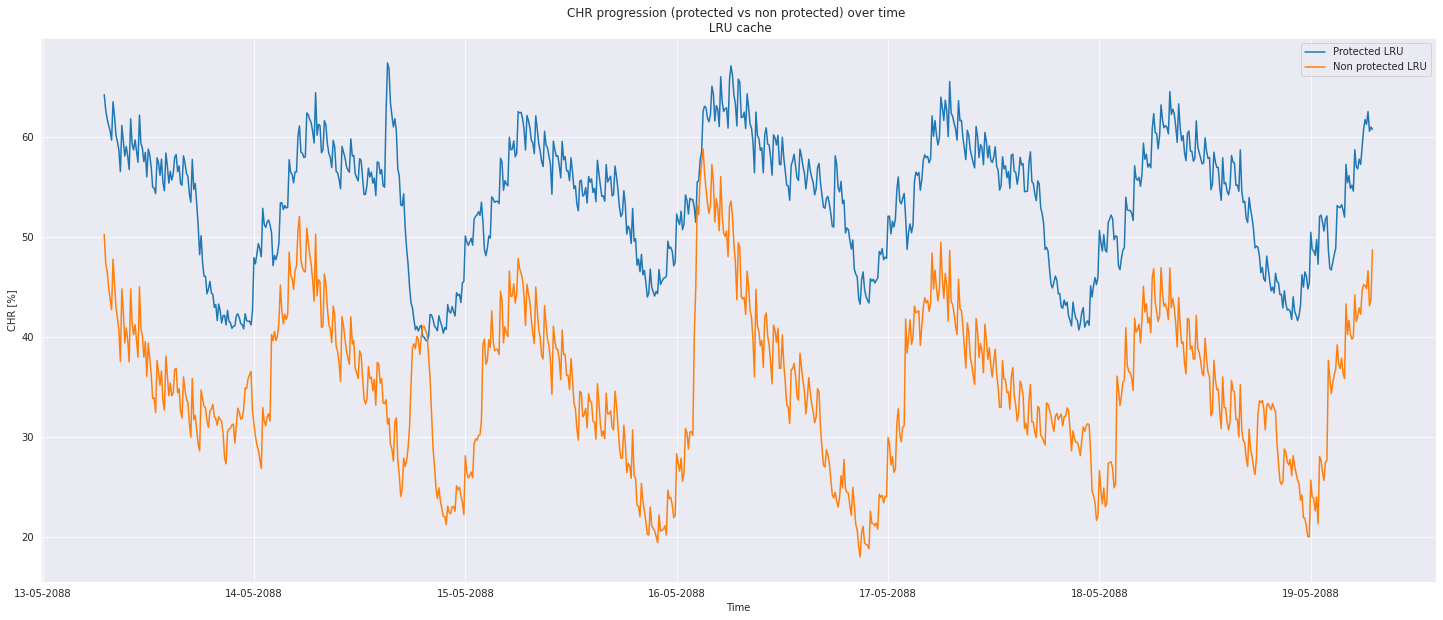

In [19]:
CHR_progression(df_CHR_PLRU, df_CHR_LRU, filename="LRU")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


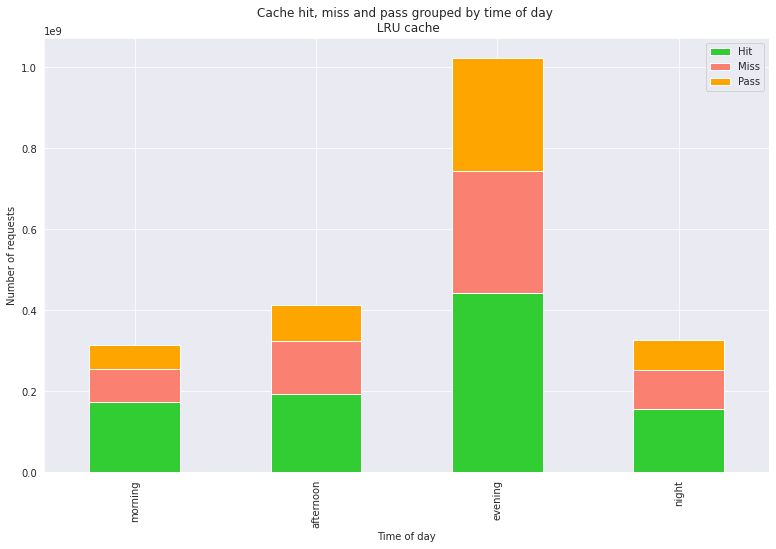

In [20]:
tod(df_time_PLRU, filename="LRU")

## LFU

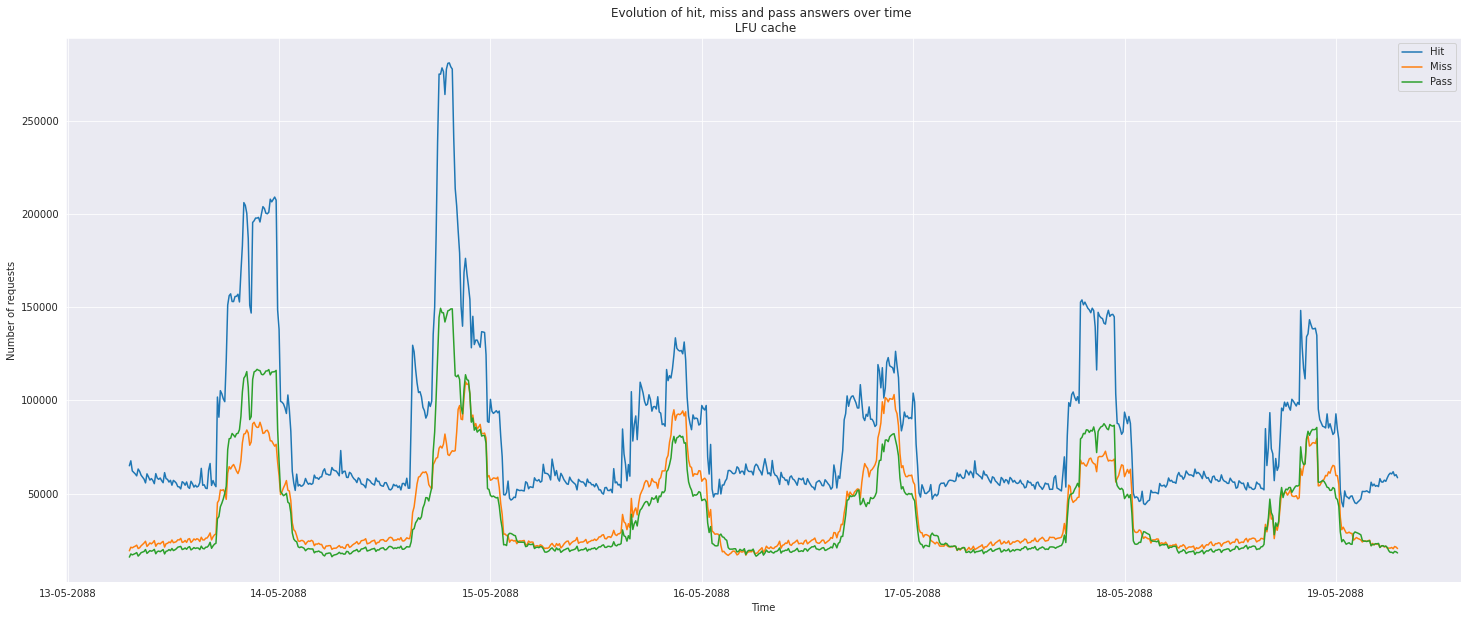

In [21]:
status_progression(df_time_PLFU, filename="LFU")

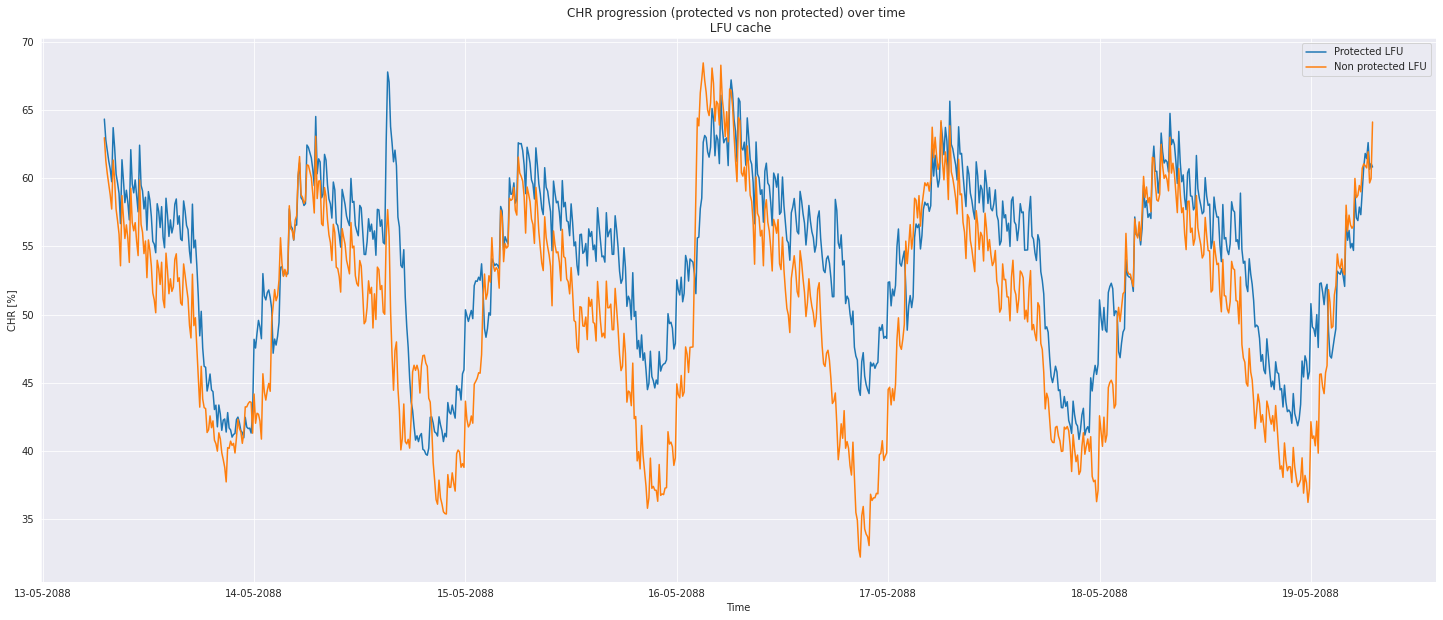

In [22]:
CHR_progression(df_CHR_PLFU, df_CHR_LFU, filename="LFU")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


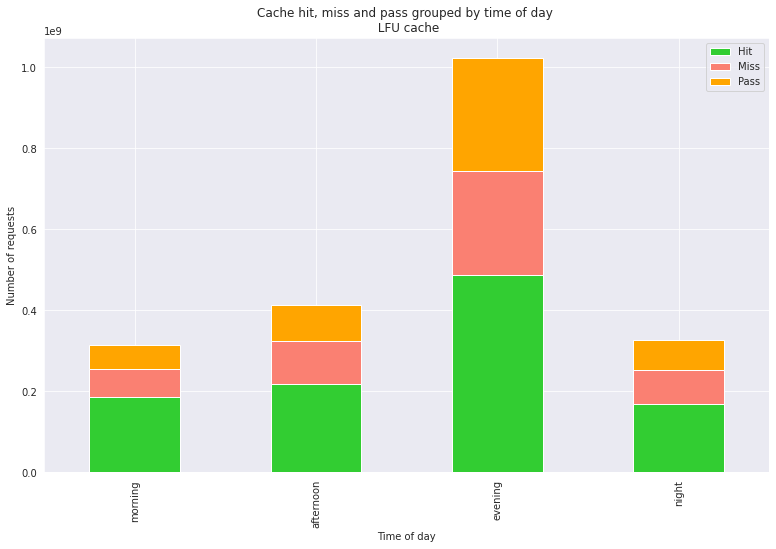

In [23]:
tod(df_time_PLFU, filename="LFU")

## LSO

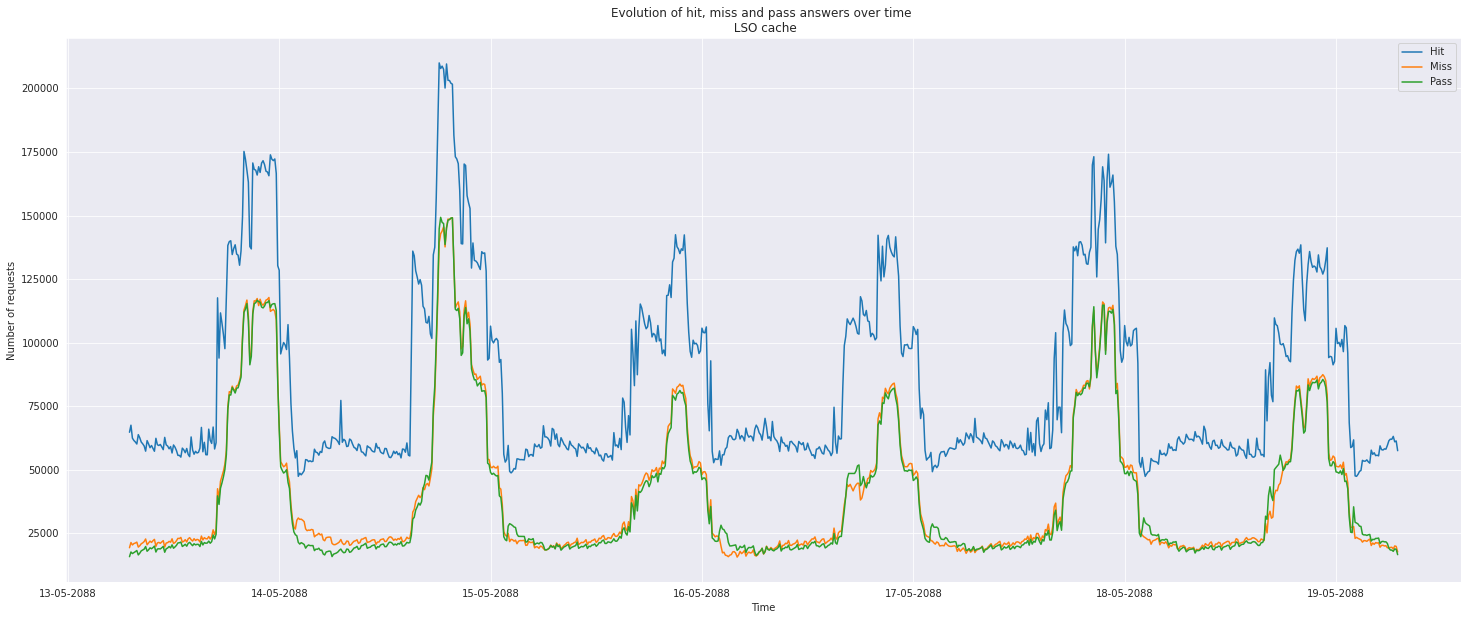

In [24]:
status_progression(df_time_PLSO, filename="LSO")

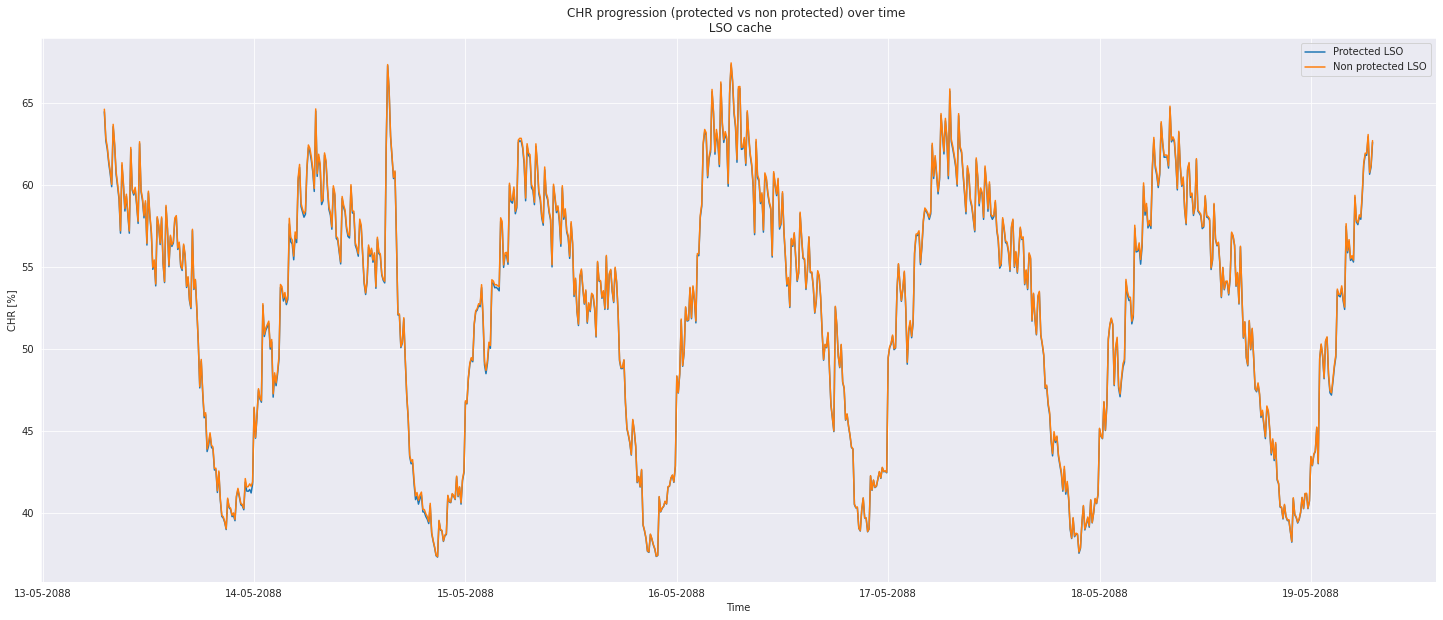

In [25]:
CHR_progression(df_CHR_PLSO, df_CHR_LSO, filename="LSO")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


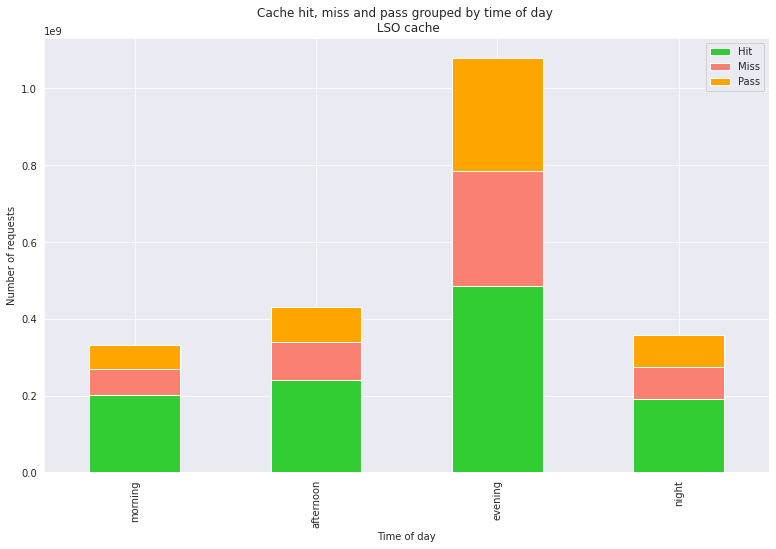

In [26]:
tod(df_time_PLSO, filename="LSO")

## SSO

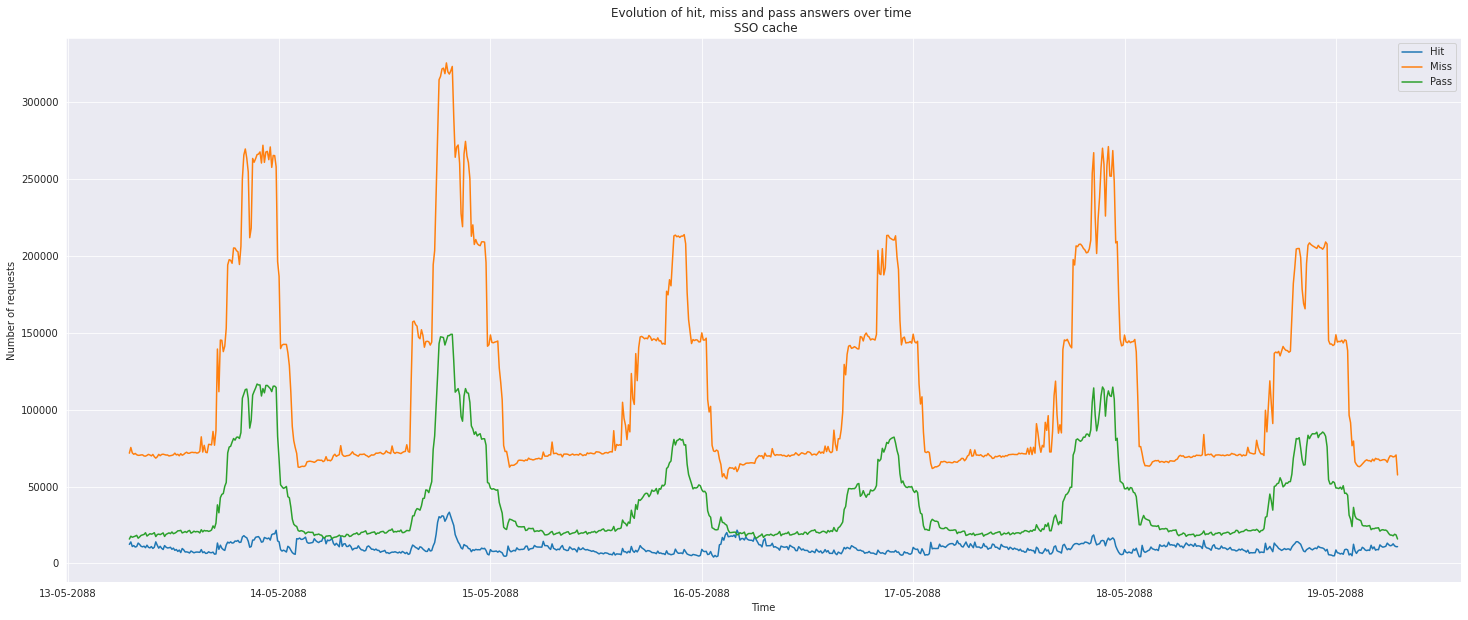

In [27]:
status_progression(df_time_PSSO, filename="SSO")

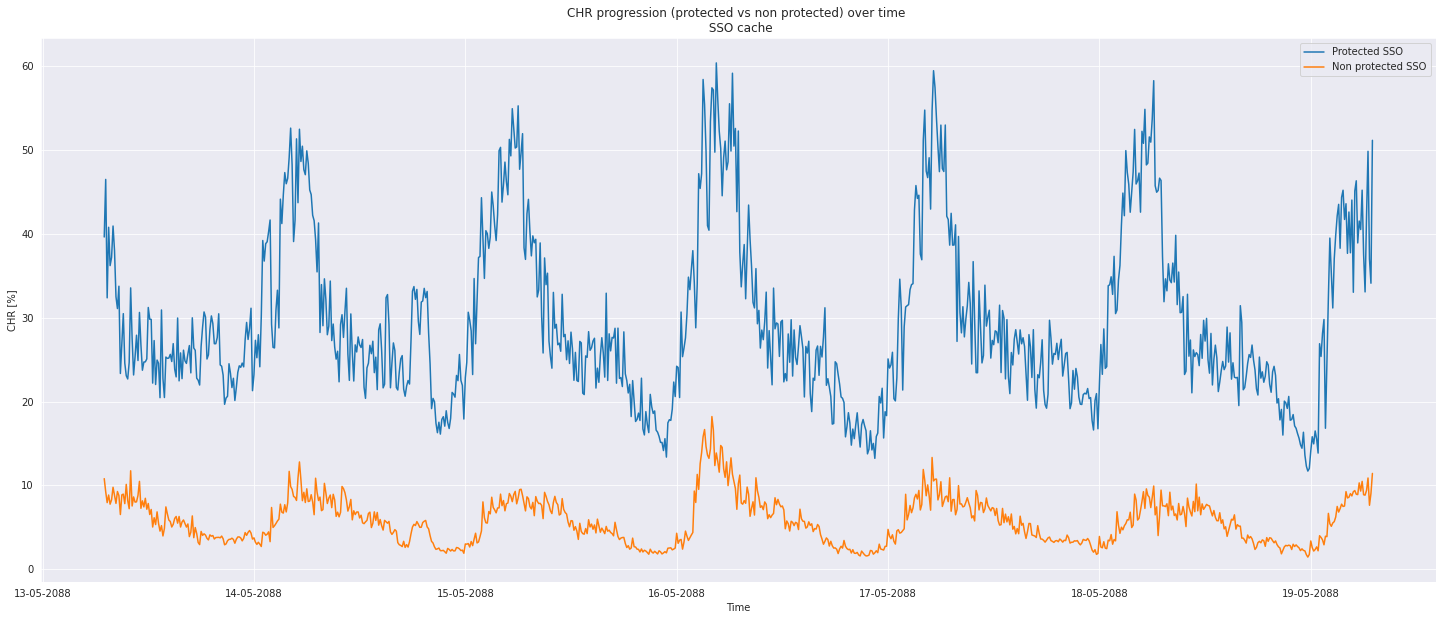

In [28]:
CHR_progression(df_CHR_PSSO, df_CHR_SSO, filename="SSO")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


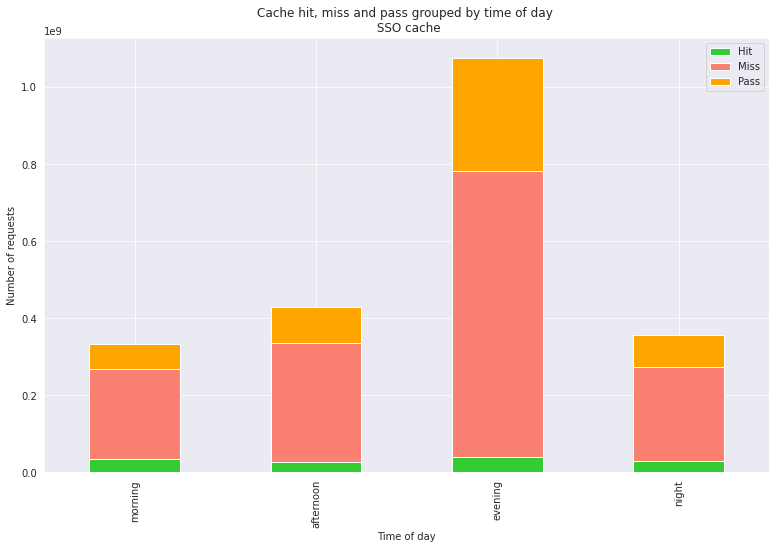

In [29]:
tod(df_time_PSSO, filename="SSO")

## Comparison between the different types of caches (size 10 000)

### Grouped by time of day

#### Normalization of the data

In [5]:
df2_time_normalized = df_time.groupby(['tod', 'CacheType'])['Hit', 'Miss', 'Pass', 'Total'].sum()
df2_time_normalized.index = [df2_time_normalized.index.get_level_values(0).astype(cat_tod),df2_time_normalized.index.get_level_values(1).astype(cat_cacheType)]
df2_time_normalized = df2_time_normalized.sort_index()
df2_time_normalized["Hit"] = df2_time_normalized["Hit"] / df2_time_normalized["Total"] * 100
df2_time_normalized["Miss"] = df2_time_normalized["Miss"] / df2_time_normalized["Total"] * 100
df2_time_normalized["Pass"] = df2_time_normalized["Pass"] / df2_time_normalized["Total"] * 100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


#### Barplot by time of day

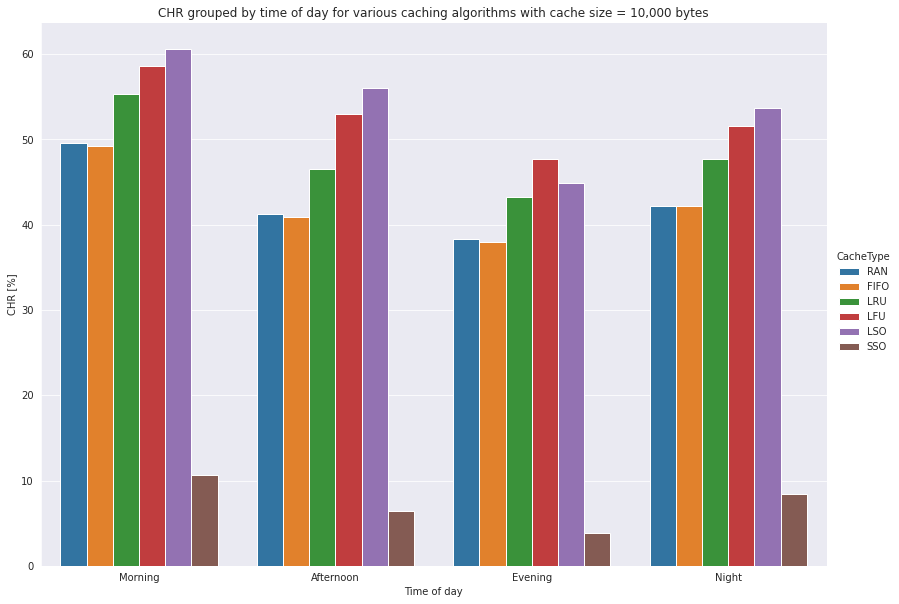

In [6]:
sns.catplot(x = "tod",       # x variable name
            y = "Hit",       # y variable name
            hue = "CacheType",  # group variable name
            data = df2_time_normalized.reset_index(level=0).reset_index(level=0),     # dataframe to plot
            kind = "bar",
            height=8.27, 
            aspect=11.7/8.27)
plt.title('CHR grouped by time of day for various caching algorithms with cache size = 10,000 bytes')
plt.xlabel("Time of day")
plt.ylabel("CHR [%]")
plt.savefig("tod_10000.png", bbox_inches = 'tight')
plt.show()

## Comparison between the different types of caches (size 100 000)

In [8]:
df_time_PRAN = pd.read_csv("./results/CHR_PRAN_100000_time.csv")
df_time_PFIFO = pd.read_csv("./results/CHR_PFIFO_100000_time.csv")
df_time_PLRU = pd.read_csv("./results/CHR_PLRU_100000_time.csv")
df_time_PLFU = pd.read_csv("./results/CHR_PLFU_100000_time.csv")
df_time_PLSO = pd.read_csv("./results/CHR_PLSO_100000_time.csv")
df_time_PSSO = pd.read_csv("./results/CHR_PSSO_100000_time.csv")
df_time_PRAN["Time"] = pd.to_datetime(df_time_PRAN["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PFIFO["Time"] = pd.to_datetime(df_time_PFIFO["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PLRU["Time"] = pd.to_datetime(df_time_PLRU["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PLFU["Time"] = pd.to_datetime(df_time_PLFU["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PLSO["Time"] = pd.to_datetime(df_time_PLSO["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PSSO["Time"] = pd.to_datetime(df_time_PSSO["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PRAN["CacheType"] = "RAN"
df_time_PFIFO["CacheType"] = "FIFO"
df_time_PLRU["CacheType"] = "LRU"
df_time_PLFU["CacheType"] = "LFU"
df_time_PLSO["CacheType"] = "LSO"
df_time_PSSO["CacheType"] = "SSO"
df_time_PRAN.index = df_time_PRAN["Time"]
df_time_PFIFO.index = df_time_PFIFO["Time"]
df_time_PLRU.index = df_time_PLRU["Time"]
df_time_PLFU.index = df_time_PLFU["Time"]
df_time_PLSO.index = df_time_PLSO["Time"]
df_time_PSSO.index = df_time_PSSO["Time"]

df_time = pd.concat([df_time_PRAN, df_time_PFIFO, df_time_PLRU, df_time_PLFU, df_time_PLSO, df_time_PSSO])
# Time of day: morning, afternoon, evening, night
df_time['tod'] = pd.cut(pd.to_datetime(df_time.Time).dt.hour,
       bins=[0, 6, 12, 18, 24],
       labels=['Night', 'Morning', 'Afternoon', 'Evening'],
       right=False,
       include_lowest=True)

df2_time = df_time.groupby(['tod', 'CacheType'])['Hit', 'Miss', 'Pass'].sum()
cat_tod = CategoricalDtype(
    ['Morning', 'Afternoon', 'Evening', 'Night'], 
    ordered=True)
cat_cacheType = CategoricalDtype(
    ['RAN', 'FIFO', 'LRU', 'LFU', 'LSO', 'SSO'], 
    ordered=True)


df2_time.index = [df2_time.index.get_level_values(0).astype(cat_tod),df2_time.index.get_level_values(1).astype(cat_cacheType)]
df2_time = df2_time.sort_index()
sns.set_style("darkgrid")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


### Grouped by time of day

#### Normalization of the data

In [9]:
df2_time_normalized = df_time.groupby(['tod', 'CacheType'])['Hit', 'Miss', 'Pass', 'Total'].sum()
df2_time_normalized.index = [df2_time_normalized.index.get_level_values(0).astype(cat_tod),df2_time_normalized.index.get_level_values(1).astype(cat_cacheType)]
df2_time_normalized = df2_time_normalized.sort_index()
df2_time_normalized["Hit"] = df2_time_normalized["Hit"] / df2_time_normalized["Total"] * 100
df2_time_normalized["Miss"] = df2_time_normalized["Miss"] / df2_time_normalized["Total"] * 100
df2_time_normalized["Pass"] = df2_time_normalized["Pass"] / df2_time_normalized["Total"] * 100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


#### Barplot by time of day

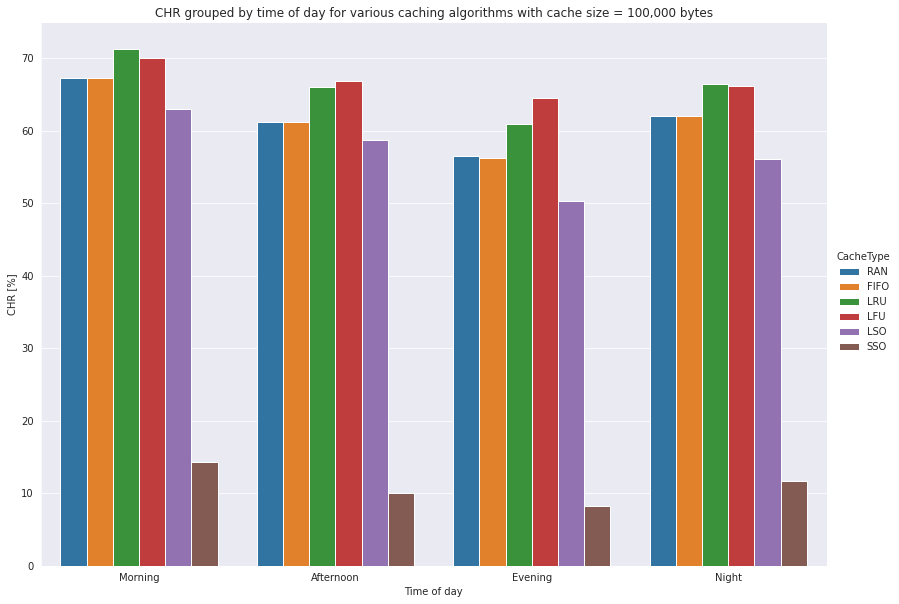

In [10]:
sns.catplot(x = "tod",       # x variable name
            y = "Hit",       # y variable name
            hue = "CacheType",  # group variable name
            data = df2_time_normalized.reset_index(level=0).reset_index(level=0),     # dataframe to plot
            kind = "bar",
            height=8.27, 
            aspect=11.7/8.27)
plt.title('CHR grouped by time of day for various caching algorithms with cache size = 100,000 bytes')
plt.xlabel("Time of day")
plt.ylabel("CHR [%]")
plt.savefig("tod_100000.png", bbox_inches = 'tight')
plt.show()

In [37]:
df_time_PRAN = pd.read_csv("./results/CHR_PRAN_10000_time.csv")
df_time_PFIFO = pd.read_csv("./results/CHR_PFIFO_10000_time.csv")
df_time_PLRU = pd.read_csv("./results/CHR_PLRU_10000_time.csv")
df_time_PLFU = pd.read_csv("./results/CHR_PLFU_10000_time.csv")
df_time_PLSO = pd.read_csv("./results/CHR_PLSO_10000_time.csv")
df_time_PSSO = pd.read_csv("./results/CHR_PSSO_10000_time.csv")
df_time_PRAN["Time"] = pd.to_datetime(df_time_PRAN["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PFIFO["Time"] = pd.to_datetime(df_time_PFIFO["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PLRU["Time"] = pd.to_datetime(df_time_PLRU["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PLFU["Time"] = pd.to_datetime(df_time_PLFU["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PLSO["Time"] = pd.to_datetime(df_time_PLSO["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PSSO["Time"] = pd.to_datetime(df_time_PSSO["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PRAN["CacheType"] = "RAN"
df_time_PFIFO["CacheType"] = "FIFO"
df_time_PLRU["CacheType"] = "LRU"
df_time_PLFU["CacheType"] = "LFU"
df_time_PLSO["CacheType"] = "LSO"
df_time_PSSO["CacheType"] = "SSO"
df_time_PRAN.index = df_time_PRAN["Time"]
df_time_PFIFO.index = df_time_PFIFO["Time"]
df_time_PLRU.index = df_time_PLRU["Time"]
df_time_PLFU.index = df_time_PLFU["Time"]
df_time_PLSO.index = df_time_PLSO["Time"]
df_time_PSSO.index = df_time_PSSO["Time"]

df_time = pd.concat([df_time_PRAN, df_time_PFIFO, df_time_PLRU, df_time_PLFU, df_time_PLSO, df_time_PSSO])
# Time of day: morning, afternoon, evening, night
df_time['tod'] = pd.cut(pd.to_datetime(df_time.Time).dt.hour,
       bins=[0, 6, 12, 18, 24],
       labels=['Night', 'Morning', 'Afternoon', 'Evening'],
       right=False,
       include_lowest=True)

df2_time = df_time.groupby(['tod', 'CacheType'])['Hit', 'Miss', 'Pass'].sum()
cat_tod = CategoricalDtype(
    ['Morning', 'Afternoon', 'Evening', 'Night'], 
    ordered=True)
cat_cacheType = CategoricalDtype(
    ['RAN', 'FIFO', 'LRU', 'LFU', 'LSO', 'SSO'], 
    ordered=True)


df2_time.index = [df2_time.index.get_level_values(0).astype(cat_tod),df2_time.index.get_level_values(1).astype(cat_cacheType)]
df2_time = df2_time.sort_index()
sns.set_style("darkgrid")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


# CHR by movie over time (bubble charts)

**Cache size: 10 000**

## Uploading CSV file

In [ ]:
uploaded = files.upload()
df_FIFO_movies = pd.read_csv(io.BytesIO(uploaded['CHR_PFIFO_movies.csv']))
df_LFU_movies = pd.read_csv(io.BytesIO(uploaded['CHR_PLFU_movies.csv']))
df_RAN_movies = pd.read_csv(io.BytesIO(uploaded['CHR_PRAN_movies.csv']))
df_LRU_movies = pd.read_csv(io.BytesIO(uploaded['CHR_PLRU_movies.csv']))
df_LSO_movies = pd.read_csv(io.BytesIO(uploaded['CHR_PLSO_movies.csv']))
df_SSO_movies = pd.read_csv(io.BytesIO(uploaded['CHR_PSSO_movies.csv']))

Saving CHR_PFIFO_final.csv to CHR_PFIFO_final.csv
Saving CHR_PFIFO_movies.csv to CHR_PFIFO_movies.csv
Saving CHR_PFIFO_regular.csv to CHR_PFIFO_regular.csv
Saving CHR_PFIFO_time.csv to CHR_PFIFO_time.csv
Saving CHR_PLFU_final.csv to CHR_PLFU_final.csv
Saving CHR_PLFU_movies.csv to CHR_PLFU_movies.csv
Saving CHR_PLFU_regular.csv to CHR_PLFU_regular.csv
Saving CHR_PLFU_time.csv to CHR_PLFU_time.csv
Saving CHR_PLRU_final.csv to CHR_PLRU_final.csv
Saving CHR_PLRU_movies.csv to CHR_PLRU_movies.csv
Saving CHR_PLRU_regular.csv to CHR_PLRU_regular.csv
Saving CHR_PLRU_time.csv to CHR_PLRU_time.csv
Saving CHR_PLSO_final.csv to CHR_PLSO_final.csv
Saving CHR_PLSO_movies.csv to CHR_PLSO_movies.csv
Saving CHR_PLSO_regular.csv to CHR_PLSO_regular.csv
Saving CHR_PLSO_time.csv to CHR_PLSO_time.csv
Saving CHR_PRAN_final.csv to CHR_PRAN_final.csv
Saving CHR_PRAN_movies.csv to CHR_PRAN_movies.csv
Saving CHR_PRAN_regular.csv to CHR_PRAN_regular.csv
Saving CHR_PRAN_time.csv to CHR_PRAN_time.csv
Saving CHR_P

## Group and sort the most popular movies

In [ ]:
def popular_movies_df(df_movies):
  df_sort = df_movies.groupby("MovieID", as_index=False).sum()
  df_sort["Sum"] = df_sort["Hit"]+df_sort["Miss"]
  df_sort.sort_values("Sum", ascending=False, inplace=True)
  df_sort.drop_duplicates(subset=['Sum'], inplace=True)
  most_popular_movies = []
  for index, movie_name in enumerate(df_sort["MovieID"]):
    if index<=100:
      most_popular_movies.append(movie_name) 
  epoch_set = set(df_movies["Epoch_second"])
  df_movies[df_movies['MovieID'].isin(most_popular_movies)]
  df_popular_movies = df_movies[df_movies['MovieID'].isin(most_popular_movies)]
  df_popular_movies['Total'] = df_popular_movies["Hit"]+df_popular_movies["Miss"]
  df_popular_movies['Epoch_second'] = df_popular_movies['Epoch_second'].apply(lambda x: dt.datetime.utcfromtimestamp(x).isoformat())
  df_popular_movies["Epoch_second"] = pd.to_datetime(df_popular_movies["Epoch_second"], format="%Y-%m-%dT%H:%M:%S.%f")
  df_popular_movies = pd.merge(df_popular_movies, df_sort[['MovieID','Sum']],on='MovieID', how='left')
  return df_popular_movies.sort_values(by="Sum", ascending=True)

## RAN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

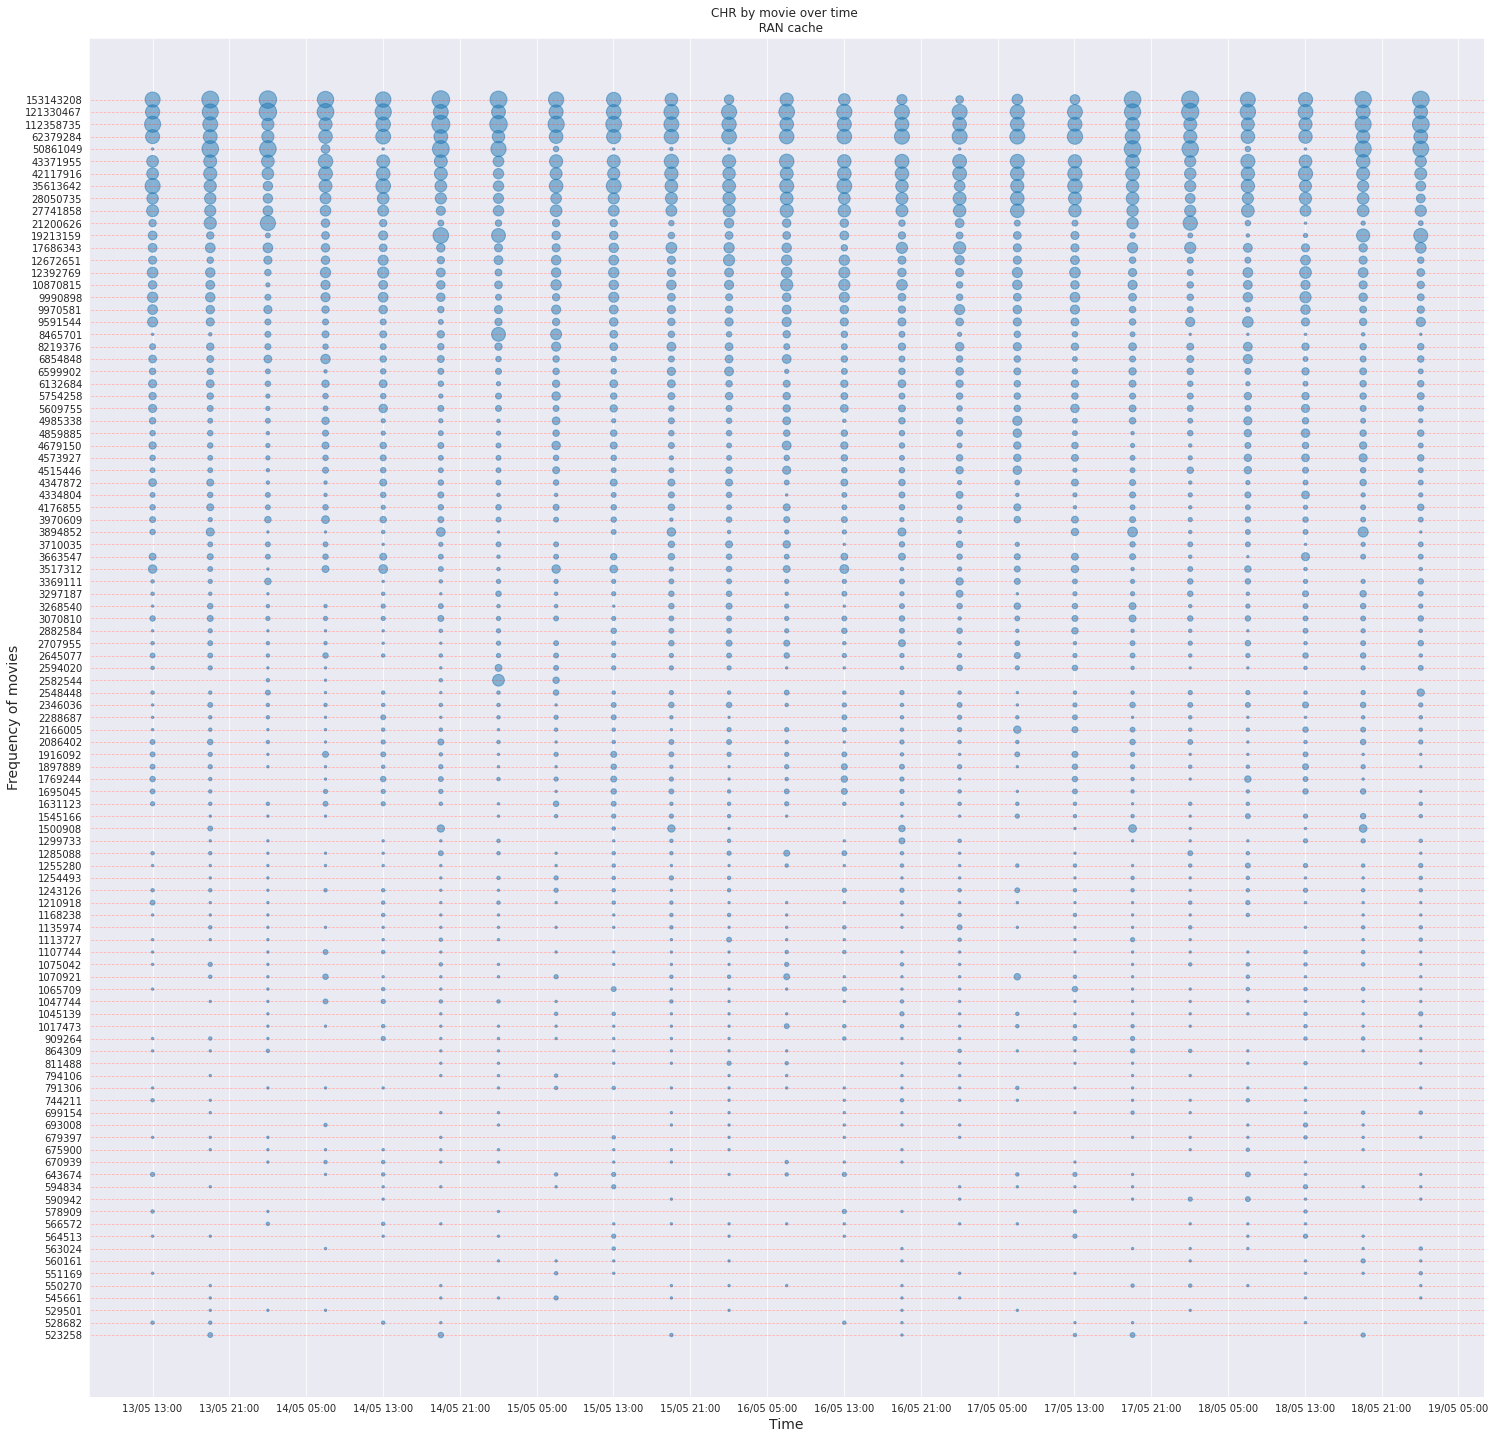

In [ ]:
df_popular_movies_sorted = popular_movies_df(df_RAN_movies)

fig, ax = plt.subplots(figsize=(25,25))
plt.scatter(df_popular_movies_sorted['Epoch_second'], df_popular_movies_sorted['Sum'].astype(str),
                 alpha=0.5,
                 s = df_popular_movies_sorted['CHR']*6)
plt.xlabel("Time", size=14)
ax.xaxis.set_major_formatter(md.DateFormatter('%d/%m %H:%M'))
hours = md.HourLocator(interval = 8)
ax.xaxis.set_major_locator(hours)
plt.ylabel("Frequency of movies", size=14)

for movie_frequency in set(df_popular_movies_sorted['Sum'].astype(str)):
  plt.axhline(y = movie_frequency, color = 'r', linestyle = ':', linewidth=0.5)
ax.set_title('CHR by movie over time \n  RAN cache')
plt.savefig("RAN_movies.png", bbox_inches = 'tight')
plt.show()

## FIFO

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

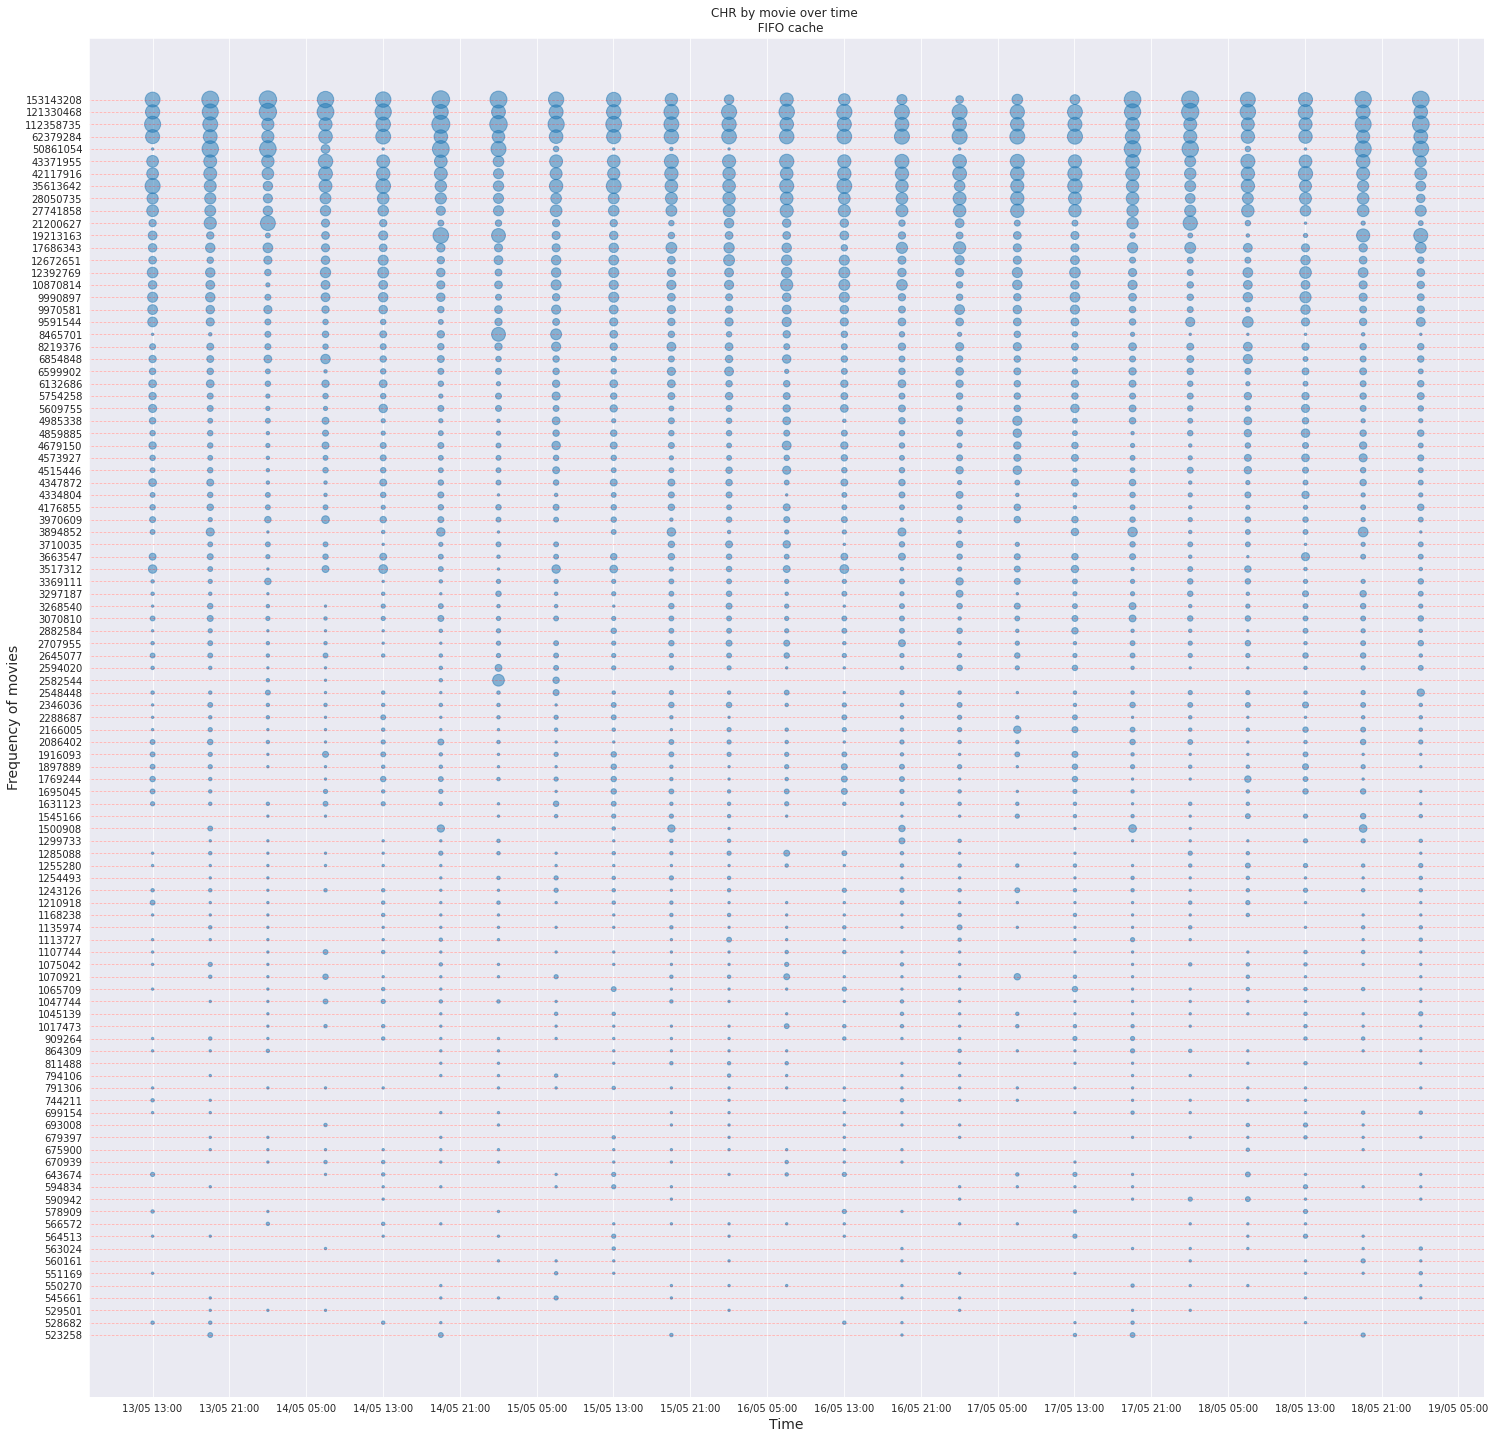

In [ ]:
df_popular_movies_sorted = popular_movies_df(df_FIFO_movies)

fig, ax = plt.subplots(figsize=(25,25))
plt.scatter(df_popular_movies_sorted['Epoch_second'], df_popular_movies_sorted['Sum'].astype(str),
                 alpha=0.5,
                 s = df_popular_movies_sorted['CHR']*6)
plt.xlabel("Time", size=14)
ax.xaxis.set_major_formatter(md.DateFormatter('%d/%m %H:%M'))
hours = md.HourLocator(interval = 8)
ax.xaxis.set_major_locator(hours)
plt.ylabel("Frequency of movies", size=14)

for movie_frequency in set(df_popular_movies_sorted['Sum'].astype(str)):
  plt.axhline(y = movie_frequency, color = 'r', linestyle = ':', linewidth=0.5)
ax.set_title('CHR by movie over time \n  FIFO cache')
plt.savefig("FIFO_movies.png", bbox_inches = 'tight')
plt.show()

## LRU

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

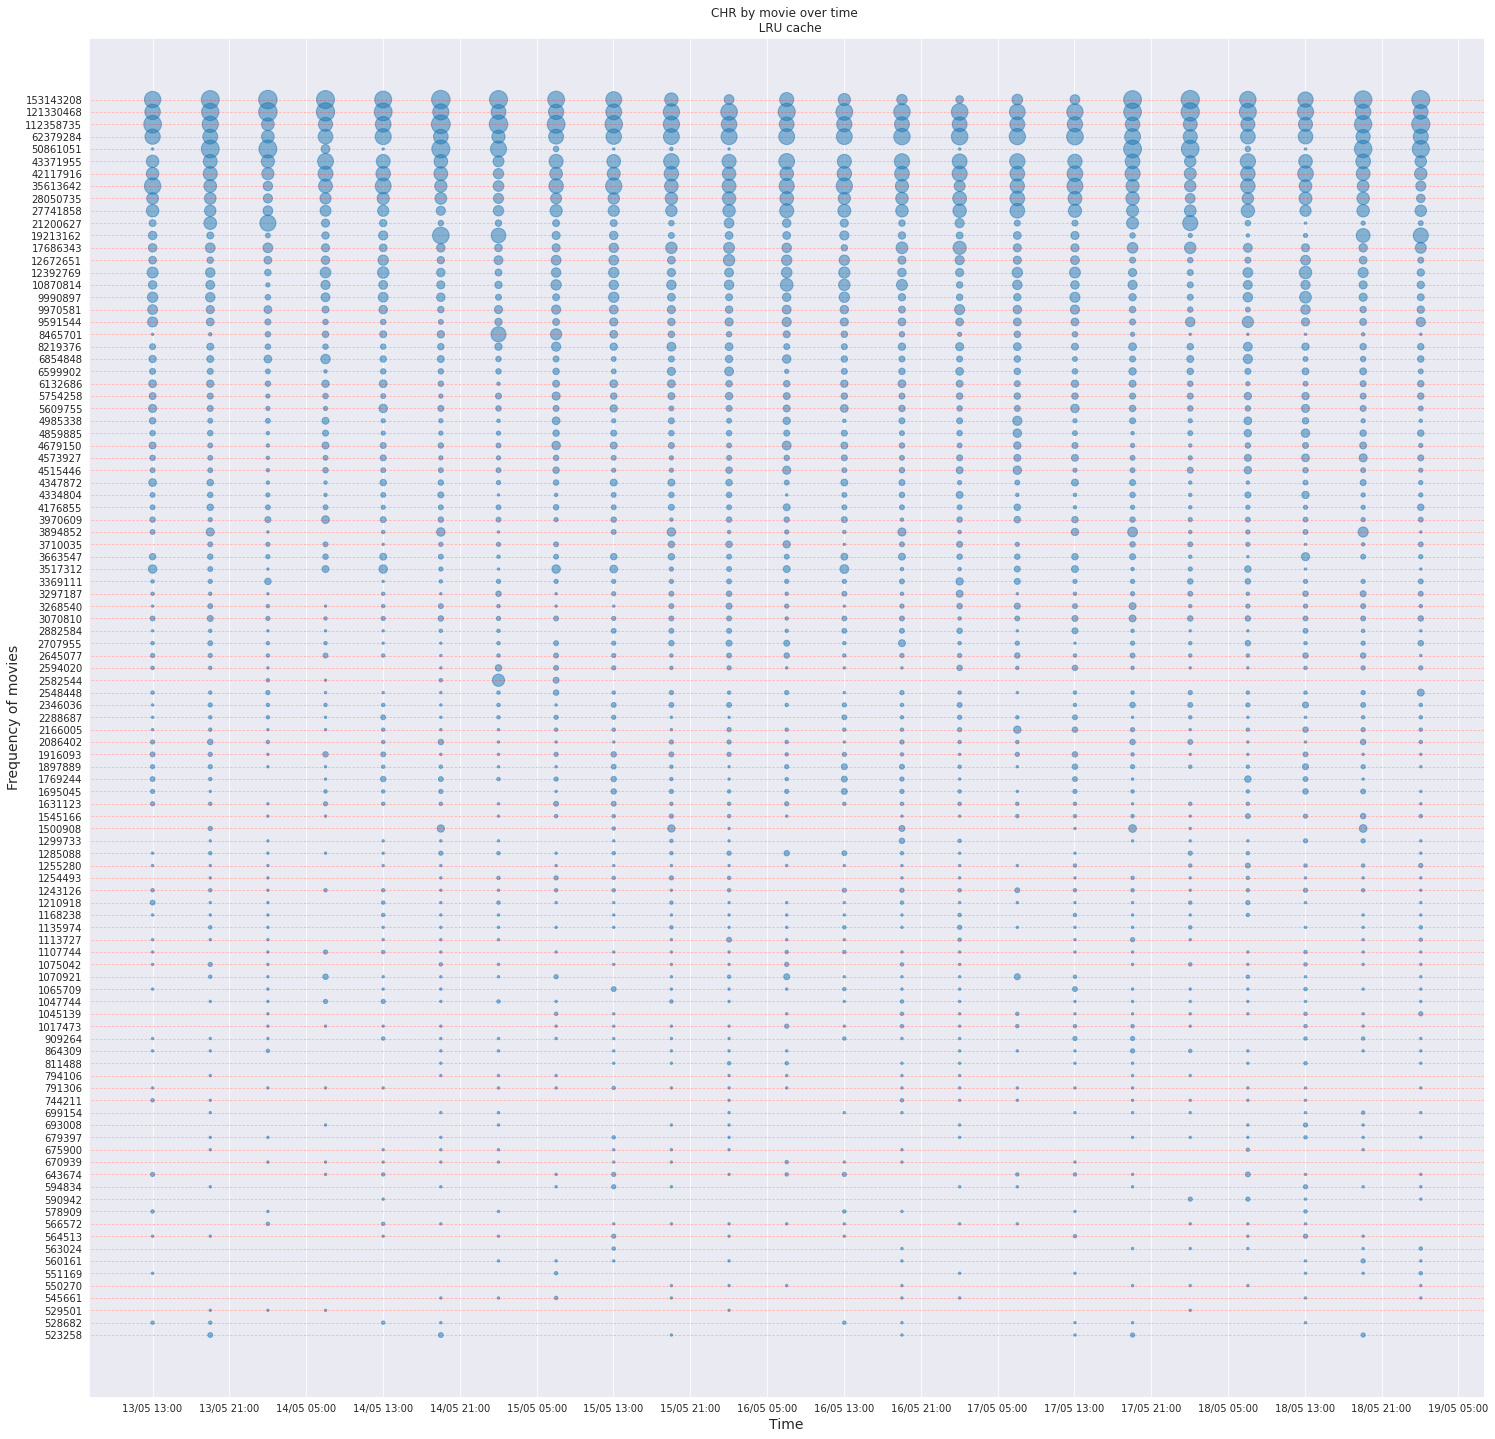

In [ ]:
df_popular_movies_sorted = popular_movies_df(df_LRU_movies)

fig, ax = plt.subplots(figsize=(25,25))
plt.scatter(df_popular_movies_sorted['Epoch_second'], df_popular_movies_sorted['Sum'].astype(str),
                 alpha=0.5,
                 s = df_popular_movies_sorted['CHR']*6)
plt.xlabel("Time", size=14)
ax.xaxis.set_major_formatter(md.DateFormatter('%d/%m %H:%M'))
hours = md.HourLocator(interval = 8)
ax.xaxis.set_major_locator(hours)
plt.ylabel("Frequency of movies", size=14)

for movie_frequency in set(df_popular_movies_sorted['Sum'].astype(str)):
  plt.axhline(y = movie_frequency, color = 'r', linestyle = ':', linewidth=0.5)
ax.set_title('CHR by movie over time \n  LRU cache')
plt.savefig("LRU_movies.png", bbox_inches = 'tight')
plt.show()

## LFU

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

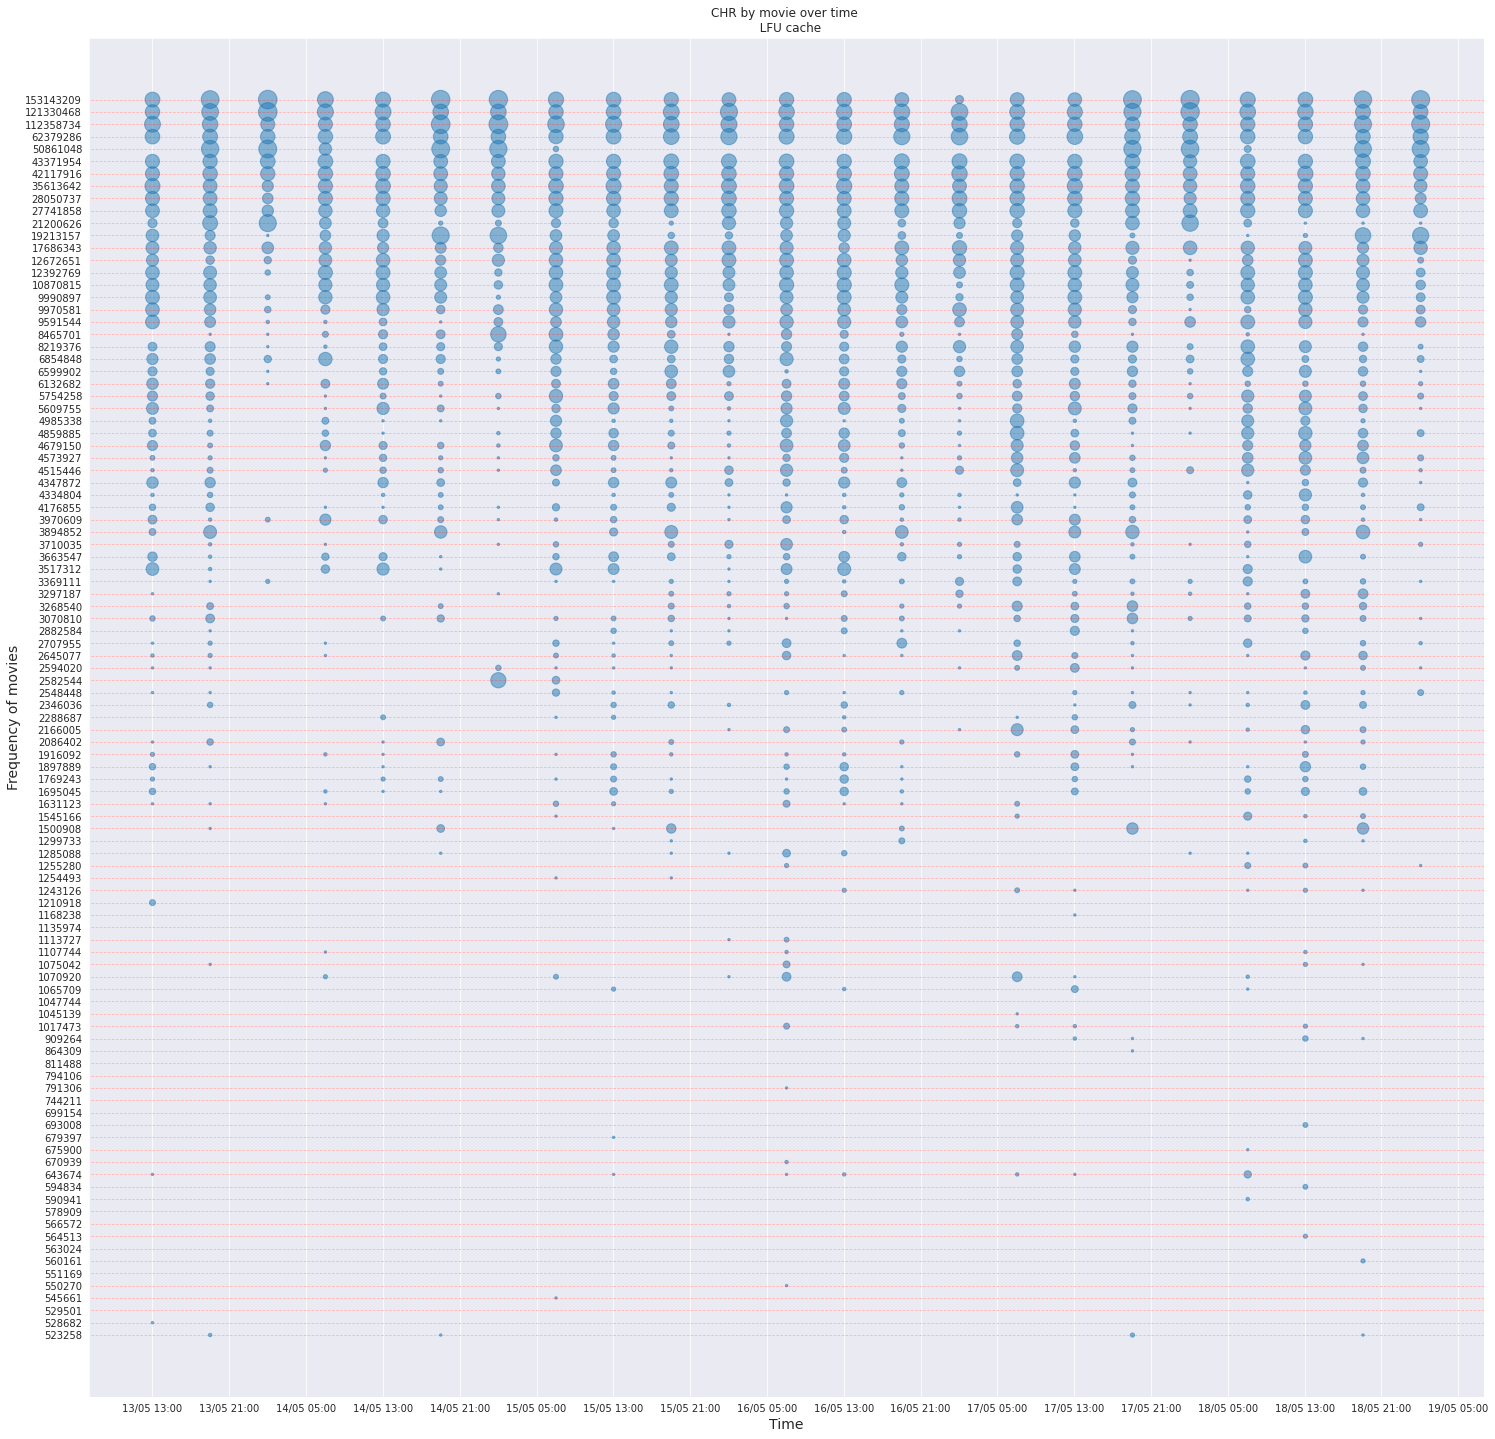

In [ ]:
df_popular_movies_sorted = popular_movies_df(df_LFU_movies)

fig, ax = plt.subplots(figsize=(25,25))
plt.scatter(df_popular_movies_sorted['Epoch_second'], df_popular_movies_sorted['Sum'].astype(str),
                 alpha=0.5,
                 s = df_popular_movies_sorted['CHR']*6)
plt.xlabel("Time", size=14)
ax.xaxis.set_major_formatter(md.DateFormatter('%d/%m %H:%M'))
hours = md.HourLocator(interval = 8)
ax.xaxis.set_major_locator(hours)
plt.ylabel("Frequency of movies", size=14)

for movie_frequency in set(df_popular_movies_sorted['Sum'].astype(str)):
  plt.axhline(y = movie_frequency, color = 'r', linestyle = ':', linewidth=0.5)
ax.set_title('CHR by movie over time \n  LFU cache')
plt.savefig("LFU_movies.png", bbox_inches = 'tight')
plt.show()

## LSO

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

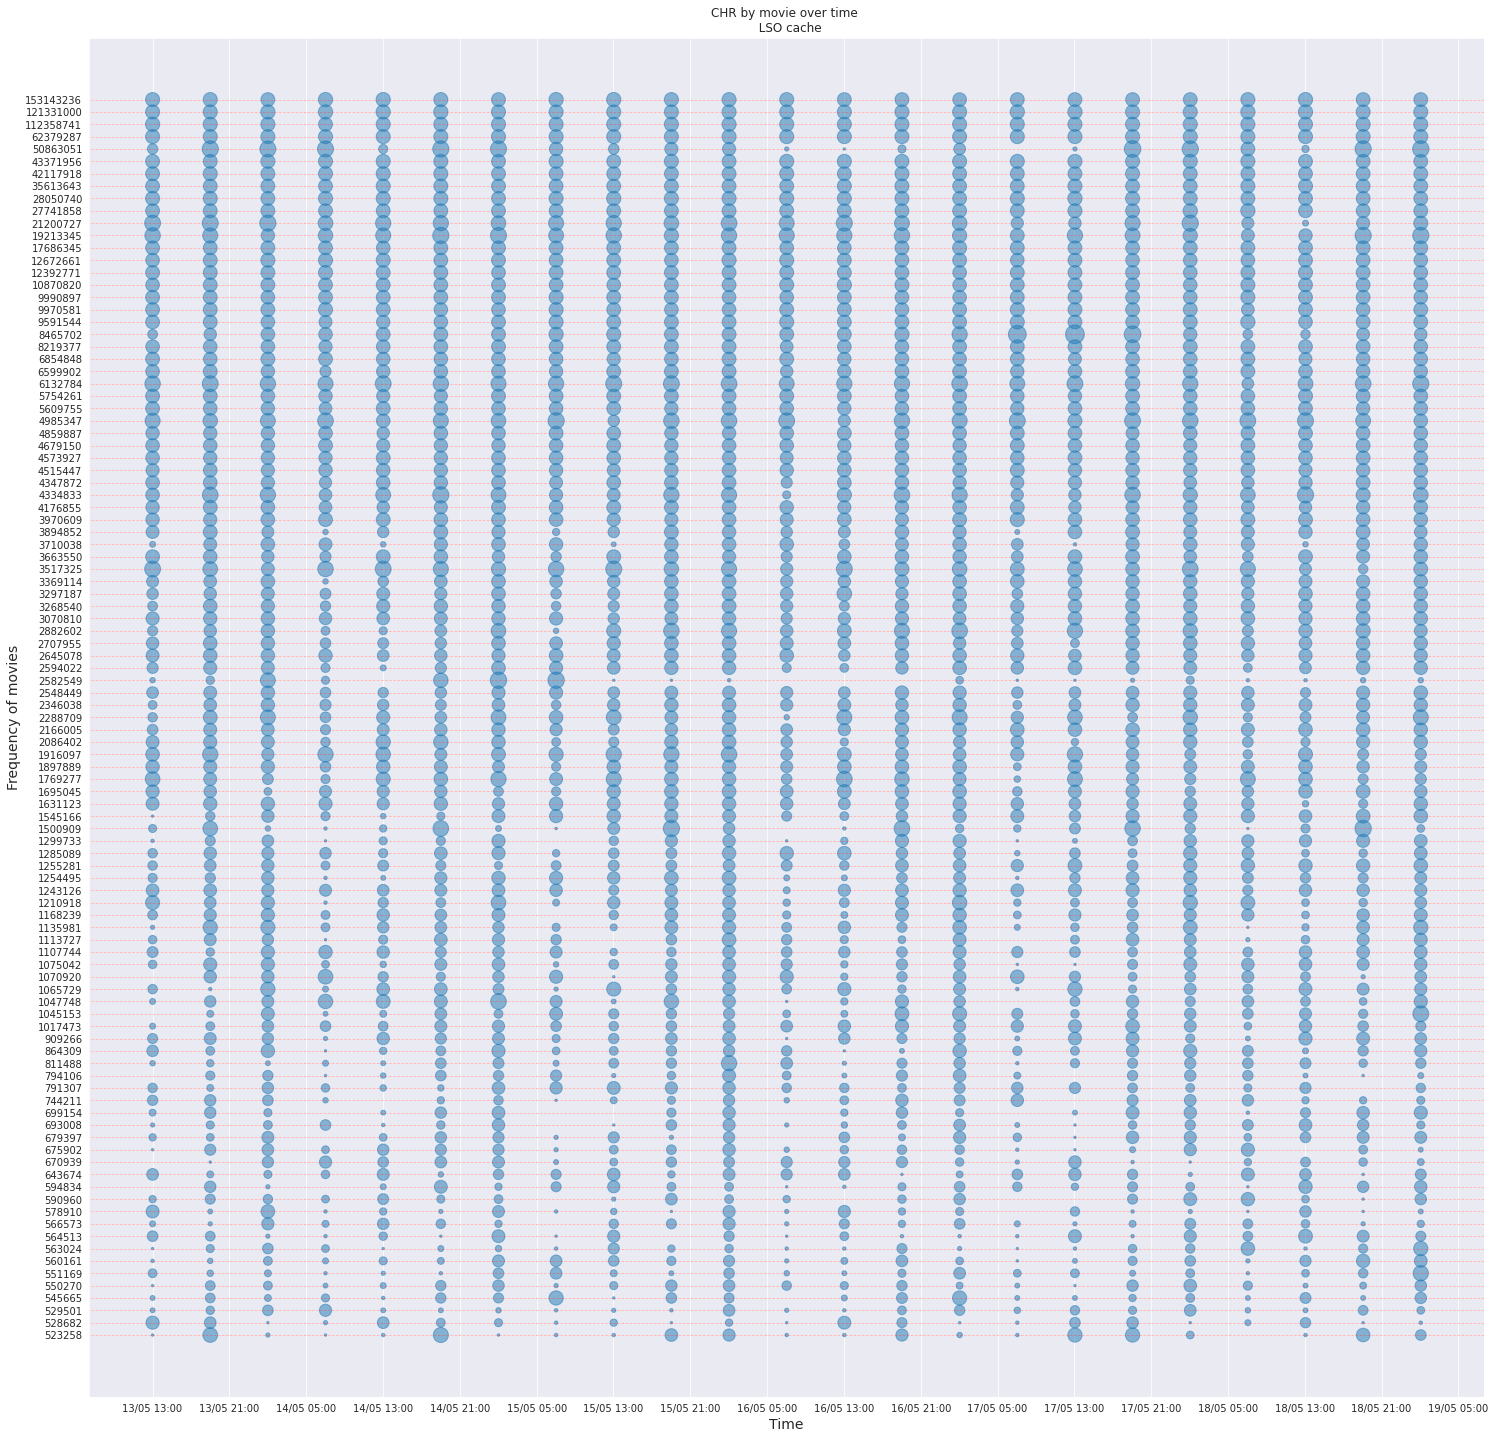

In [ ]:
df_popular_movies_sorted = popular_movies_df(df_LSO_movies)

fig, ax = plt.subplots(figsize=(25,25))
plt.scatter(df_popular_movies_sorted['Epoch_second'], df_popular_movies_sorted['Sum'].astype(str),
                 alpha=0.5,
                 s = df_popular_movies_sorted['CHR']*6)
plt.xlabel("Time", size=14)
ax.xaxis.set_major_formatter(md.DateFormatter('%d/%m %H:%M'))
hours = md.HourLocator(interval = 8)
ax.xaxis.set_major_locator(hours)
plt.ylabel("Frequency of movies", size=14)

for movie_frequency in set(df_popular_movies_sorted['Sum'].astype(str)):
  plt.axhline(y = movie_frequency, color = 'r', linestyle = ':', linewidth=0.5)
ax.set_title('CHR by movie over time \n  LSO cache')
plt.savefig("LSO_movies.png", bbox_inches = 'tight')
plt.show()

## SSO

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

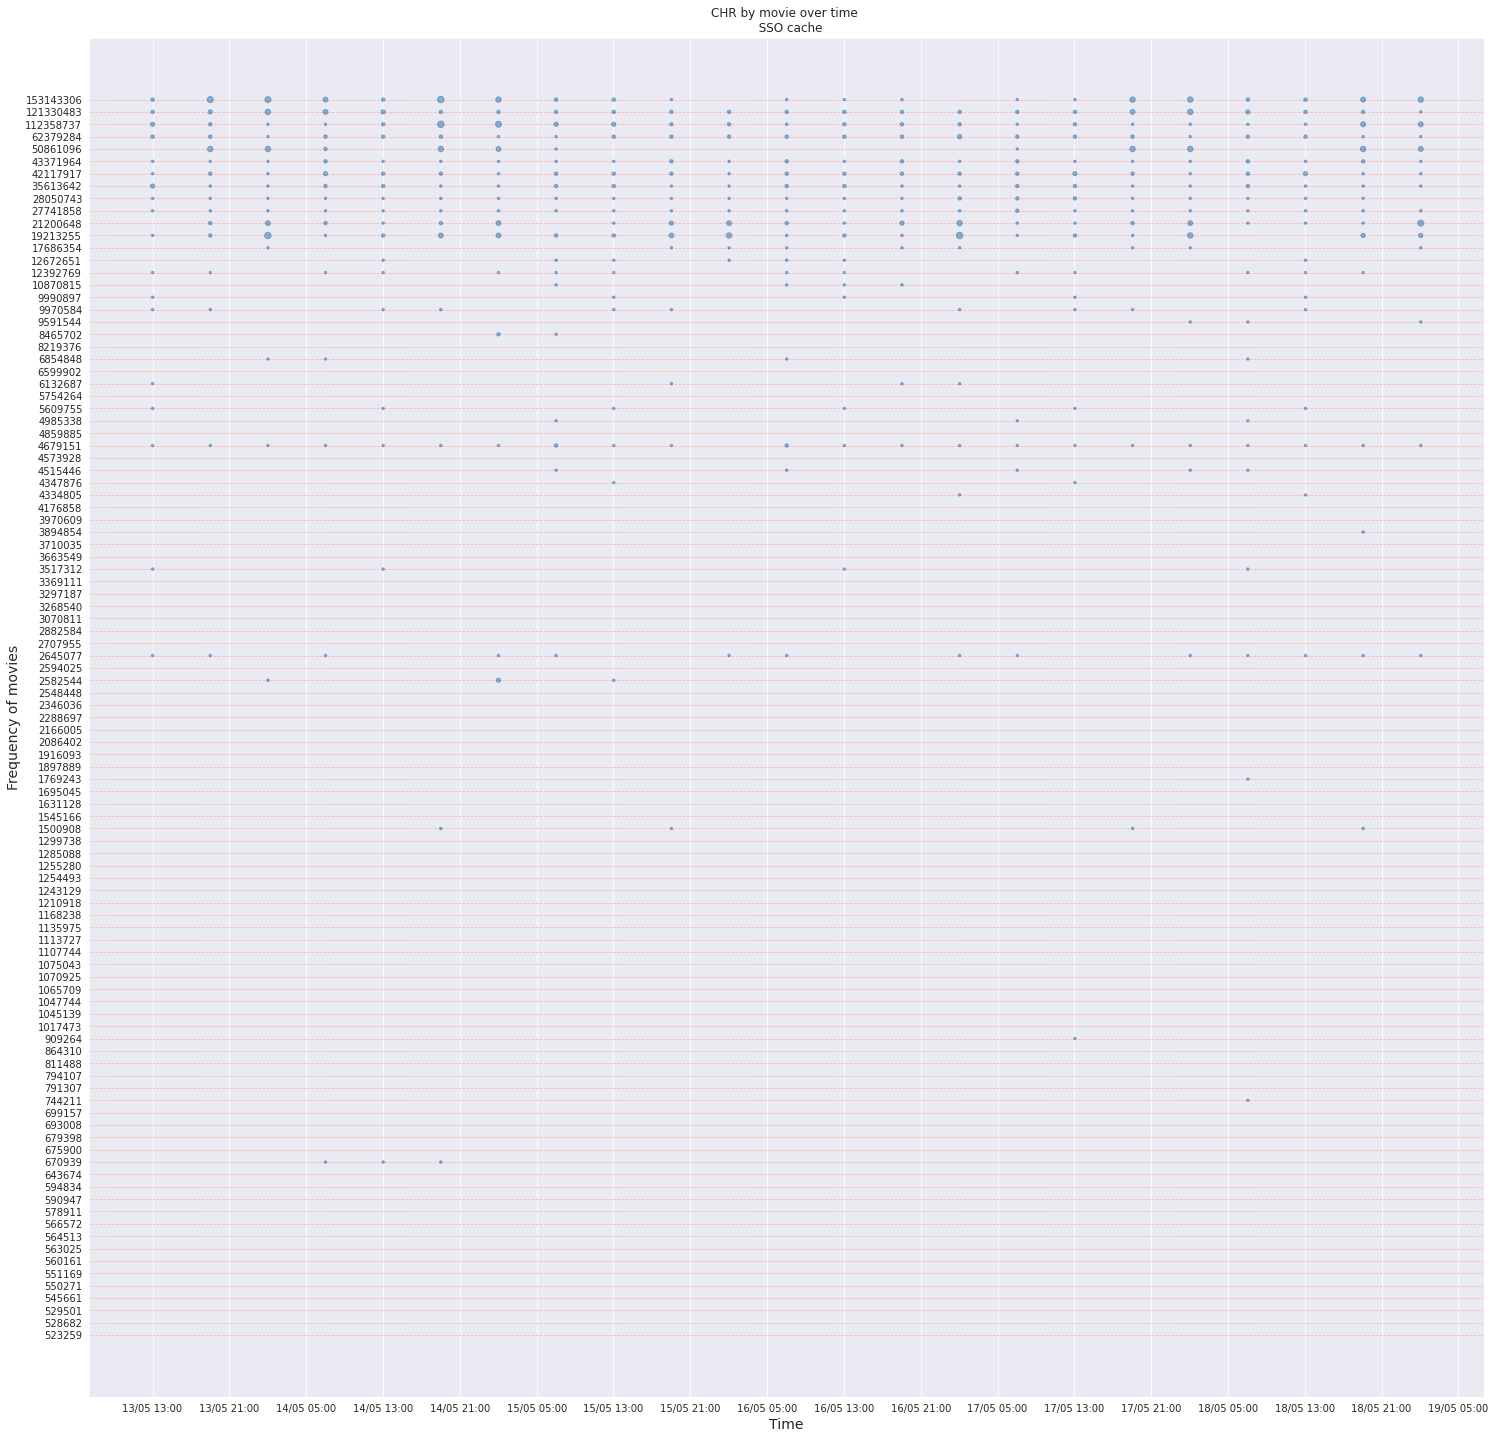

In [ ]:
df_popular_movies_sorted = popular_movies_df(df_SSO_movies)

fig, ax = plt.subplots(figsize=(25,25))
plt.scatter(df_popular_movies_sorted['Epoch_second'], df_popular_movies_sorted['Sum'].astype(str),
                 alpha=0.5,
                 s = df_popular_movies_sorted['CHR']*6)
plt.xlabel("Time", size=14)
ax.xaxis.set_major_formatter(md.DateFormatter('%d/%m %H:%M'))
hours = md.HourLocator(interval = 8)
ax.xaxis.set_major_locator(hours)
plt.ylabel("Frequency of movies", size=14)

for movie_frequency in set(df_popular_movies_sorted['Sum'].astype(str)):
  plt.axhline(y = movie_frequency, color = 'r', linestyle = ':', linewidth=0.5)
ax.set_title('CHR by movie over time \n  SSO cache')
plt.savefig("SSO_movies.png", bbox_inches = 'tight')
plt.show()

# Comparison for different cache sizes

## Dataframes creation

In [3]:
# RAN
file_list = glob.glob("./results/*PRAN_[0-9]*_final.csv")
PRAN_regular_df = pd.DataFrame()
for csv_name in file_list:
  data = pd.read_csv(csv_name)
  df = pd.DataFrame(data)
  df["Size"] = int(csv_name.split('_')[2])
  PRAN_regular_df = pd.concat([PRAN_regular_df,df],axis=0)
PRAN_regular_df.sort_values(by="Size", ascending=True, inplace=True)
PRAN_regular_df.set_index('Size', inplace=True)
PRAN_regular_df.index = PRAN_regular_df.index.map(str)

normalized_PRAN_df = copy.deepcopy(PRAN_regular_df)
normalized_PRAN_df["Hit"] = normalized_PRAN_df["Hit"] / normalized_PRAN_df["Total"] *100
normalized_PRAN_df["Miss"] = normalized_PRAN_df["Miss"] / normalized_PRAN_df["Total"] *100
normalized_PRAN_df["Pass"] = normalized_PRAN_df["Pass"] / normalized_PRAN_df["Total"] *100

# FIFO
file_list = glob.glob("./results/*PFIFO_[0-9]*_final.csv")
PFIFO_regular_df = pd.DataFrame()
for csv_name in file_list:
  data = pd.read_csv(csv_name)
  df = pd.DataFrame(data)
  df["Size"] = int(csv_name.split('_')[2])
  PFIFO_regular_df = pd.concat([PFIFO_regular_df,df],axis=0)
PFIFO_regular_df.sort_values(by="Size", ascending=True, inplace=True)
PFIFO_regular_df.set_index('Size', inplace=True)
PFIFO_regular_df.index = PFIFO_regular_df.index.map(str)

normalized_PFIFO_df = copy.deepcopy(PFIFO_regular_df)
normalized_PFIFO_df["Hit"] = normalized_PFIFO_df["Hit"] / normalized_PFIFO_df["Total"] *100
normalized_PFIFO_df["Miss"] = normalized_PFIFO_df["Miss"] / normalized_PFIFO_df["Total"] *100
normalized_PFIFO_df["Pass"] = normalized_PFIFO_df["Pass"] / normalized_PFIFO_df["Total"] *100

# LRU
file_list = glob.glob("./results/*PLRU_[0-9]*_final.csv")
PLRU_regular_df = pd.DataFrame()
for csv_name in file_list:
  data = pd.read_csv(csv_name)
  df = pd.DataFrame(data)
  df["Size"] = int(csv_name.split('_')[2])
  PLRU_regular_df = pd.concat([PLRU_regular_df,df],axis=0)
PLRU_regular_df.sort_values(by="Size", ascending=True, inplace=True)
PLRU_regular_df.set_index('Size', inplace=True)
PLRU_regular_df.index = PLRU_regular_df.index.map(str)

normalized_PLRU_df = copy.deepcopy(PLRU_regular_df)
normalized_PLRU_df["Hit"] = normalized_PLRU_df["Hit"] / normalized_PLRU_df["Total"] *100
normalized_PLRU_df["Miss"] = normalized_PLRU_df["Miss"] / normalized_PLRU_df["Total"] *100
normalized_PLRU_df["Pass"] = normalized_PLRU_df["Pass"] / normalized_PLRU_df["Total"] *100

# LFU
file_list = glob.glob("./results/*PLFU_[0-9]*_final.csv")
PLFU_regular_df = pd.DataFrame()
for csv_name in file_list:
  data = pd.read_csv(csv_name)
  df = pd.DataFrame(data)
  df["Size"] = int(csv_name.split('_')[2])
  PLFU_regular_df = pd.concat([PLFU_regular_df,df],axis=0)
PLFU_regular_df.sort_values(by="Size", ascending=True, inplace=True)
PLFU_regular_df.set_index('Size', inplace=True)
PLFU_regular_df.index = PLFU_regular_df.index.map(str)

normalized_PLFU_df = copy.deepcopy(PLFU_regular_df)
normalized_PLFU_df["Hit"] = normalized_PLFU_df["Hit"] / normalized_PLFU_df["Total"] *100
normalized_PLFU_df["Miss"] = normalized_PLFU_df["Miss"] / normalized_PLFU_df["Total"] *100
normalized_PLFU_df["Pass"] = normalized_PLFU_df["Pass"] / normalized_PLFU_df["Total"] *100

# LSO
file_list = glob.glob("./results/*PLSO_[0-9]*_final.csv")
PLSO_regular_df = pd.DataFrame()
for csv_name in file_list:
  data = pd.read_csv(csv_name)
  df = pd.DataFrame(data)
  df["Size"] = int(csv_name.split('_')[2])
  PLSO_regular_df = pd.concat([PLSO_regular_df,df],axis=0)
PLSO_regular_df.sort_values(by="Size", ascending=True, inplace=True)
PLSO_regular_df.set_index('Size', inplace=True)
PLSO_regular_df.index = PLSO_regular_df.index.map(str)

normalized_PLSO_df = copy.deepcopy(PLSO_regular_df)
normalized_PLSO_df["Hit"] = normalized_PLSO_df["Hit"] / normalized_PLSO_df["Total"] *100
normalized_PLSO_df["Miss"] = normalized_PLSO_df["Miss"] / normalized_PLSO_df["Total"] *100
normalized_PLSO_df["Pass"] = normalized_PLSO_df["Pass"] / normalized_PLSO_df["Total"] *100

# SSO
file_list = glob.glob("./results/*PSSO_[0-9]*_final.csv")
PSSO_regular_df = pd.DataFrame()
for csv_name in file_list:
  data = pd.read_csv(csv_name)
  df = pd.DataFrame(data)
  df["Size"] = int(csv_name.split('_')[2])
  PSSO_regular_df = pd.concat([PSSO_regular_df,df],axis=0)
PSSO_regular_df.sort_values(by="Size", ascending=True, inplace=True)
PSSO_regular_df.set_index('Size', inplace=True)
PSSO_regular_df.index = PSSO_regular_df.index.map(str)

normalized_PSSO_df = copy.deepcopy(PRAN_regular_df)
normalized_PSSO_df["Hit"] = normalized_PSSO_df["Hit"] / normalized_PSSO_df["Total"] *100
normalized_PSSO_df["Miss"] = normalized_PSSO_df["Miss"] / normalized_PSSO_df["Total"] *100
normalized_PSSO_df["Pass"] = normalized_PSSO_df["Pass"] / normalized_PSSO_df["Total"] *100

## Plotting stackebar function

In [39]:
def plot_stackedbar_p(df, fields, labels, xlegend, ylegend, colors, title, subtitle):    
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx])
        left = left + df[name]
# title and subtitle
    plt.title(title, loc='left')
    plt.text(0, ax.get_yticks()[-1] + 0.75, subtitle)
# legend
    plt.legend(labels, bbox_to_anchor=([0.58, 1, 0, 0]), ncol=4, frameon=False)
# remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
# format x ticks
    xticks = np.arange(0,101,10)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)
# adjust limits and draw grid lines
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='grey', linestyle='--')

    ax.set_ylabel(ylegend)
    ax.set_xlabel(xlegend)
sns.set_style("darkgrid")

## PRAN

In [ ]:
normalized_PRAN_df

Total        CHR        Hit       Miss       Pass
Size                                                           
50       2189450692   7.708148   7.708148   0.204701  92.087152
100      2189450692  11.292938  11.292938   3.527182  85.179880
200      2189450692  21.507424  21.507424   8.285214  70.207362
500      2189450692  32.965833  32.965833  13.347524  53.686643
1000     2189450692  39.570201  39.570201  10.061633  50.368166
2000     2189450692  45.785114  45.785114   6.294110  47.920776
5000     2189450692  49.947867  49.947867   2.155815  47.896318
10000    2189450692  41.208444  41.208444  34.498967  24.292589
20000    2189450692  48.597909  48.597909  28.642971  22.759120
50000    2189450692  57.151723  57.151723  20.540594  22.307682
100000   2189450692  59.918671  59.918671  18.376325  21.705004
1000000  2189450692  62.114930  62.114930  37.877481   0.007589

In [ ]:
PRAN_regular_df

Total        CHR         Hit       Miss        Pass
Size                                                             
50       2189450692   7.708148   168766092    4481823  2016202777
100      2189450692  11.292938   247253308   77225920  1864971464
200      2189450692  21.507424   470894438  181400679  1537155575
500      2189450692  32.965833   721770664  292237454  1175442574
1000     2189450692  39.570201   866370033  220294500  1102786159
2000     2189450692  45.785114  1002442496  137806428  1049201768
5000     2189450692  49.947867  1093583930   47200500  1048666262
10000    2189450692  41.208444   902238572  755337864   531874256
20000    2189450692  48.597909  1064027248  627123730   498299714
50000    2189450692  57.151723  1251308801  449726184   488415707
100000   2189450692  59.918671  1311889754  402340575   475220363
1000000  2189450692  62.114930  1359975769  829308765      166158

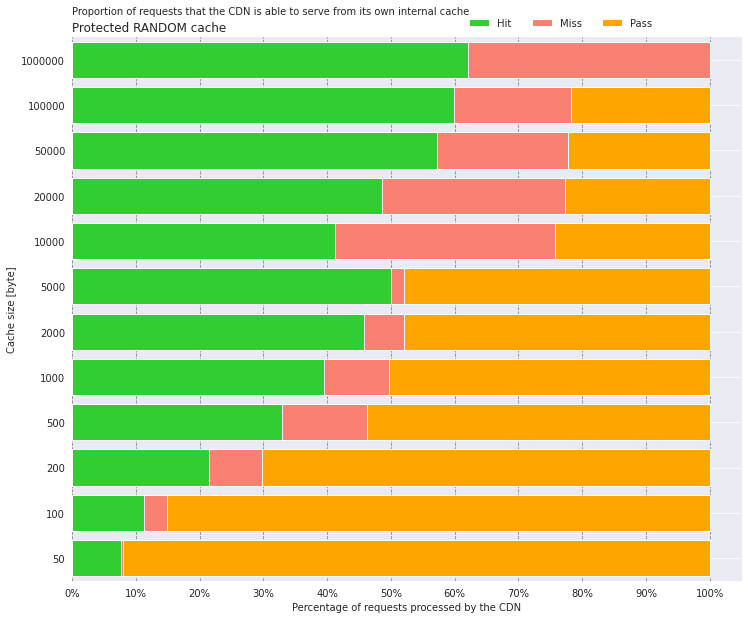

In [40]:
fields = ['Hit', 'Miss', 'Pass']
colors = ['Limegreen', 'Salmon', 'Orange']
xlegend = "Percentage of requests processed by the CDN"
ylegend = "Cache size [byte]"
labels = fields
title = 'Protected RANDOM cache'
subtitle = 'Proportion of requests that the CDN is able to serve from its own internal cache \n'
plot_stackedbar_p(normalized_PRAN_df, fields, labels, xlegend, ylegend, colors, title, subtitle)
plt.savefig("PRAN_size.png")

## PFIFO

In [ ]:
PFIFO_regular_df

Total        CHR         Hit       Miss        Pass
Size                                                              
50        2077394028   7.703593   160033984    4386185  1912973859
100       2077394028  11.203730   232745608   74305905  1770342515
200       2077394028  21.384174   444233547  173846303  1459314178
500       2077394028  32.890558   683266485  278239165  1115888378
1000      2077394028  39.524300   821075448  210398681  1045919899
2000      2077394028  45.656292   948461077  133525013   995407938
5000      2077394028  49.813624  1034825242   47669682   994899104
10000     2077394028  40.963941   850982465  722134225   504277338
20000     2077394028  48.443677  1006366059  598108210   472919759
50000     2077394028  57.101420  1186221483  427601042   463571503
100000    2077394028  59.795041  1242178606  384174090   451041332
1000000   2077394028  62.046571  1288951764  788289184      153080
5000000   2202950692  82.773762  1823465165  379454269       31258
10000000  2202950692  87.649766  1930881126  272063682        5884

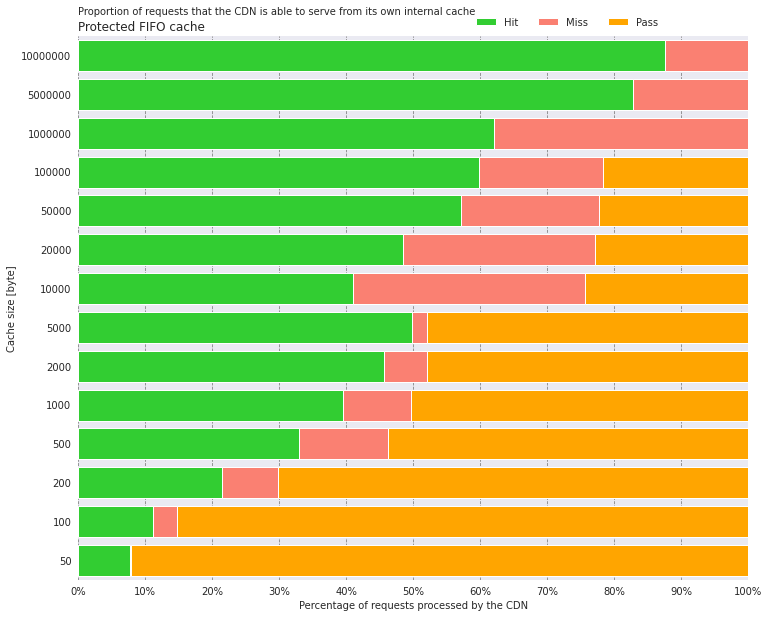

In [41]:
fields = ['Hit', 'Miss', 'Pass']
colors = ['Limegreen', 'Salmon', 'Orange']
xlegend = "Percentage of requests processed by the CDN"
ylegend = "Cache size [byte]"
labels = fields
title = 'Protected FIFO cache'
subtitle = 'Proportion of requests that the CDN is able to serve from its own internal cache \n'
plot_stackedbar_p(normalized_PFIFO_df, fields, labels, xlegend, ylegend, colors, title, subtitle)
plt.savefig("PFIFO_size.png")

## PLRU

In [ ]:
PLRU_regular_df

Total        CHR         Hit       Miss        Pass
Size                                                              
50        2077394028   7.498795   155779511    8168650  1913445867
100       2077394028  11.989531   249069803   58006992  1770317233
200       2077394028  23.200849   481973048  136098274  1459322706
500       2077394028  35.850172   744749330  216779680  1115865018
1000      2077394028  42.042490   873388172  158112055  1045893801
2000      2077394028  47.394011   984560346   97426575   995407107
5000      2077394028  50.190895  1042662649   39726927   995004452
10000     2077394028  46.429051   964514332  608613849   504265847
20000     2077394028  54.184353  1125622515  478851438   472920075
50000     2077394028  62.018522  1288369066  325455876   463569086
100000    2077394028  64.383801  1337505228  288936801   450951999
1000000   2077394028  68.689645  1426954585  650286350      153093
5000000   2202950692  86.543403  1906508504  296410817       31371
10000000  2202950692  89.763581  1977447427  225497398        5867

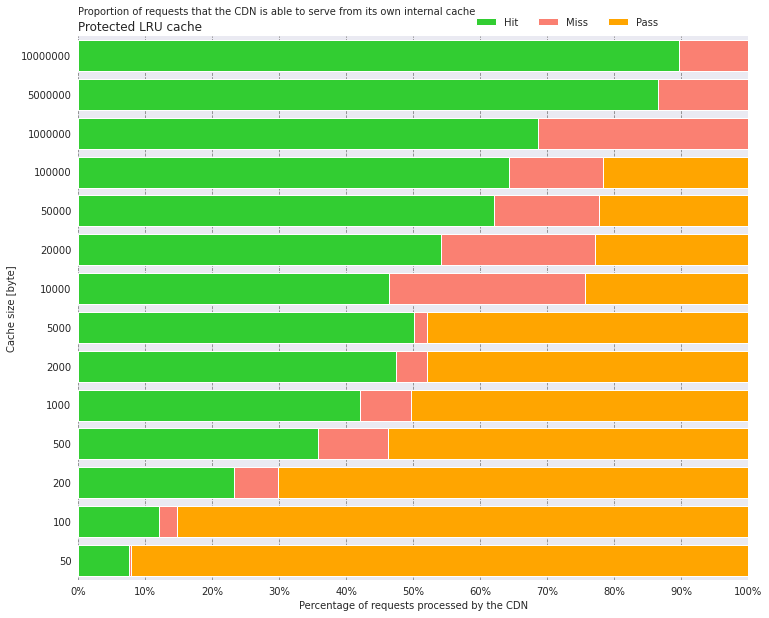

In [42]:
fields = ['Hit', 'Miss', 'Pass']
colors = ['Limegreen', 'Salmon', 'Orange']
xlegend = "Percentage of requests processed by the CDN"
ylegend = "Cache size [byte]"
labels = fields
title = 'Protected LRU cache'
subtitle = 'Proportion of requests that the CDN is able to serve from its own internal cache \n'
plot_stackedbar_p(normalized_PLRU_df, fields, labels, xlegend, ylegend, colors, title, subtitle)
plt.savefig("PLRU_size.png")

## PLFU

In [ ]:
PLFU_regular_df

Total        CHR         Hit       Miss        Pass
Size                                                              
50        2077394028   7.507083   155951698    8022935  1913419395
100       2077394028  12.755442   264980790   42283297  1770129941
200       2077394028  25.092624   521272669   96847132  1459274227
500       2077394028  39.322538   816884052  144748700  1115761276
1000      2077394028  44.270174   919665949  111861477  1045866602
2000      2077394028  48.703049  1011754227   70218499   995421302
5000      2077394028  50.399366  1046993421   35394674   995005933
10000     2077394028  51.026682  1060025249  513111084   504257695
20000     2077394028  56.483589  1173386699  431081602   472925727
50000     2077394028  62.499113  1298352832  315502538   463538658
100000    2077394028  66.067598  1372484341  254073747   450835940
1000000   2077394028  68.274584  1418332127  658908710      153191
5000000   2202950692  82.221495  1811298986  391619869       31837
10000000  2202950692  86.770436  1911509929  291434230        6533

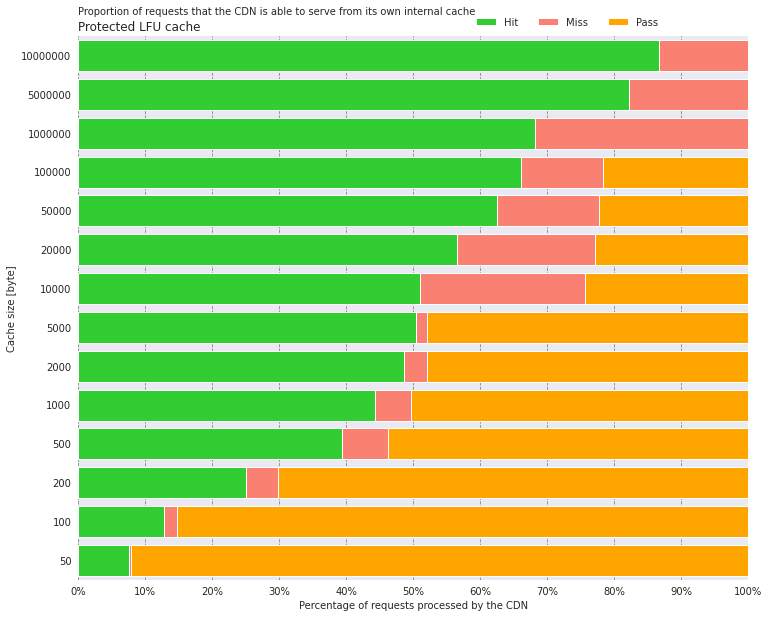

In [43]:
fields = ['Hit', 'Miss', 'Pass']
colors = ['Limegreen', 'Salmon', 'Orange']
xlegend = "Percentage of requests processed by the CDN"
ylegend = "Cache size [byte]"
labels = fields
title = 'Protected LFU cache '
subtitle = 'Proportion of requests that the CDN is able to serve from its own internal cache\n'
plot_stackedbar_p(normalized_PLFU_df, fields, labels, xlegend, ylegend, colors, title, subtitle)
plt.savefig("PLFU_size.png")

## PLSO

In [44]:
PLSO_regular_df

Total        CHR         Hit       Miss        Pass
Size                                                             
50       2199575637   7.714653   169689617    4268864  2025617156
100      2199575637  10.597819   233107042   93300526  1873168069
200      2199575637  13.442184   295670999  360044334  1543860304
500      2199575637  20.210953   444555197  574347605  1180672835
1000     2199575637  28.837748   634308088  457569358  1107698191
2000     2199575637  39.723431   873746910  271861300  1053967427
5000     2199575637  48.449322  1065679494   80369399  1053526744
10000    2199575637  50.882899  1119207860  546309824   534057953
20000    2199575637  51.319771  1128817189  570256994   500501454
50000    2199575637  52.719454  1159604265  549367283   490604089
100000   2199575637  54.796885  1205298941  516878168   477398528
1000000  2199575637  71.091280  1563706473  635704036      165128

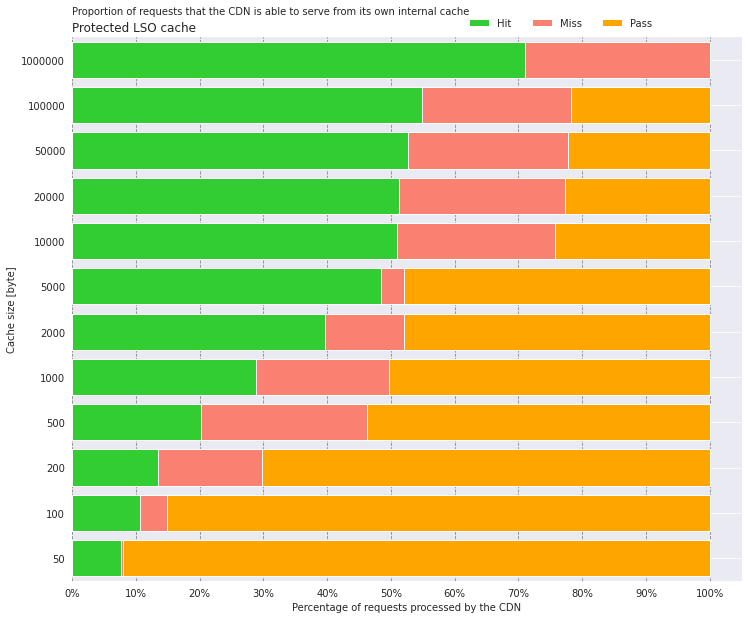

In [45]:
fields = ['Hit', 'Miss', 'Pass']
colors = ['Limegreen', 'Salmon', 'Orange']
xlegend = "Percentage of requests processed by the CDN"
ylegend = "Cache size [byte]"
labels = fields
title = 'Protected LSO cache '
subtitle = 'Proportion of requests that the CDN is able to serve from its own internal cache\n'
plot_stackedbar_p(normalized_PLSO_df, fields, labels, xlegend, ylegend, colors, title, subtitle)
plt.savefig("PLSO_size.png")

## PSSO

In [ ]:
PSSO_regular_df

Total        CHR        Hit        Miss        Pass
Size                                                             
50       2192637615   7.628241  167259692     6179249  2019198674
100      2192637615   4.420108   96916941   228037911  1867682763
200      2192637615   4.801271  105274481   548080733  1539282401
500      2192637615   5.065048  111058156   904584099  1176995360
1000     2192637615   9.024711  197879205   890579025  1104179385
2000     2192637615  15.214868  333606924   808402237  1050628454
5000     2192637615  26.655298  584454090   557988862  1050194663
10000    2192637615   6.124034  134277882  1525810063   532549670
20000    2192637615   6.560525  143848546  1549837471   498951598
50000    2192637615   7.320457  160511101  1543094662   489031852
100000   2192637615  10.088854  221211999  1495636077   475789539
1000000  2192637615   9.567549  209781676  1982690906      165033

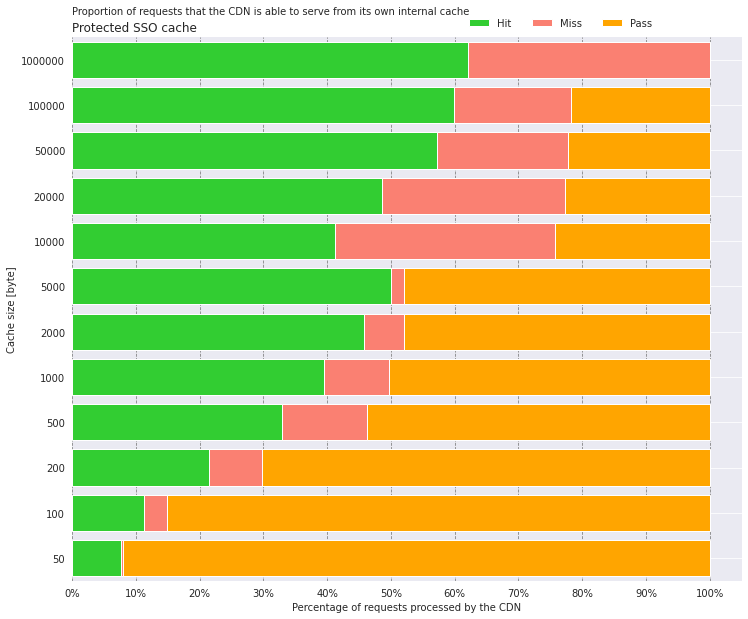

In [47]:
fields = ['Hit', 'Miss', 'Pass']
colors = ['Limegreen', 'Salmon', 'Orange']
xlegend = "Percentage of requests processed by the CDN"
ylegend = "Cache size [byte]"
labels = fields
title = 'Protected SSO cache'
subtitle = 'Proportion of requests that the CDN is able to serve from its own internal cache\n'
plot_stackedbar_p(normalized_PSSO_df, fields, labels, xlegend, ylegend, colors, title, subtitle)
plt.savefig("PSSO_size.png")

## Comparison between caches

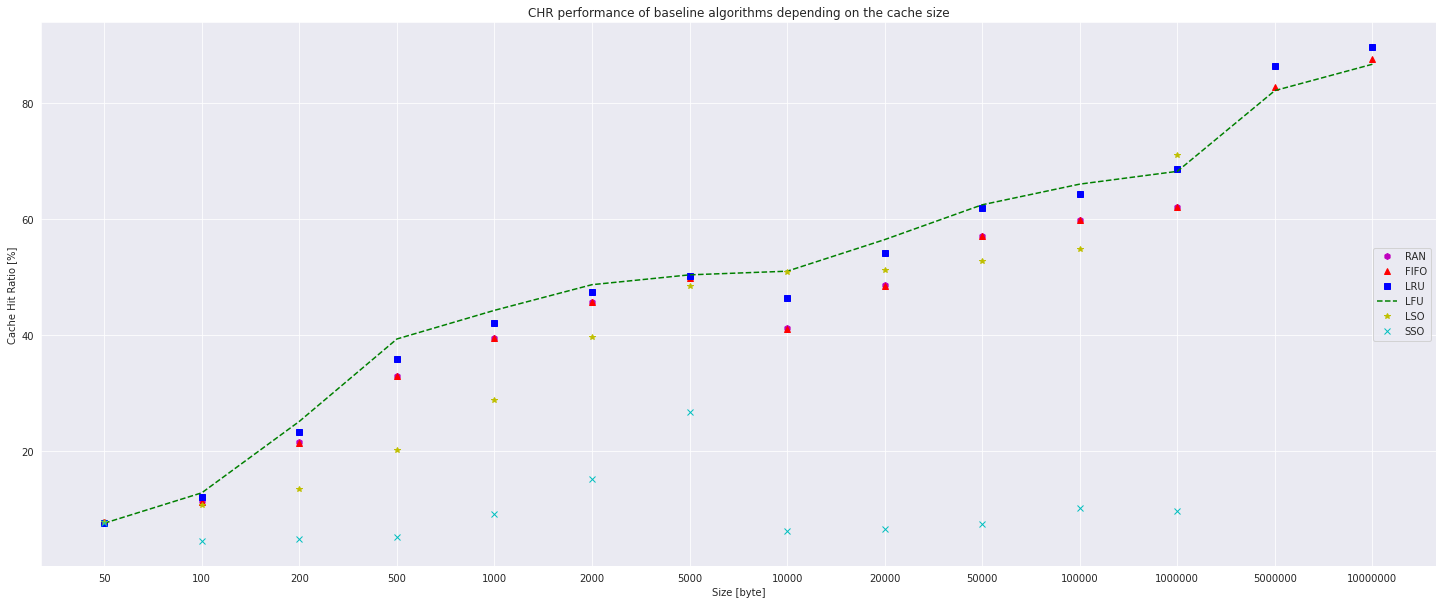

In [48]:
fig, ax = plt.subplots(figsize=(25,10))
plt.plot(list(PRAN_regular_df.index), list(PRAN_regular_df['CHR']), 'mh', list(PFIFO_regular_df.index), list(PFIFO_regular_df['CHR']), 'r^', list(PLRU_regular_df.index), list(PLRU_regular_df['CHR']), 'bs', list(PLFU_regular_df.index), list(PLFU_regular_df['CHR']), 'g--',  list(PLSO_regular_df.index), list(PLSO_regular_df['CHR']), 'y*', list(PSSO_regular_df.index), list(PSSO_regular_df['CHR']), 'cx')
ax.legend(['RAN', 'FIFO', 'LRU', 'LFU', 'LSO', 'SSO'], loc='center right')
ax.set_xlabel('Size [byte]')
ax.set_ylabel('Cache Hit Ratio [%]')
plt.title("CHR performance of baseline algorithms depending on the cache size")
plt.savefig("size_comparison.png", bbox_inches = 'tight')
plt.show()

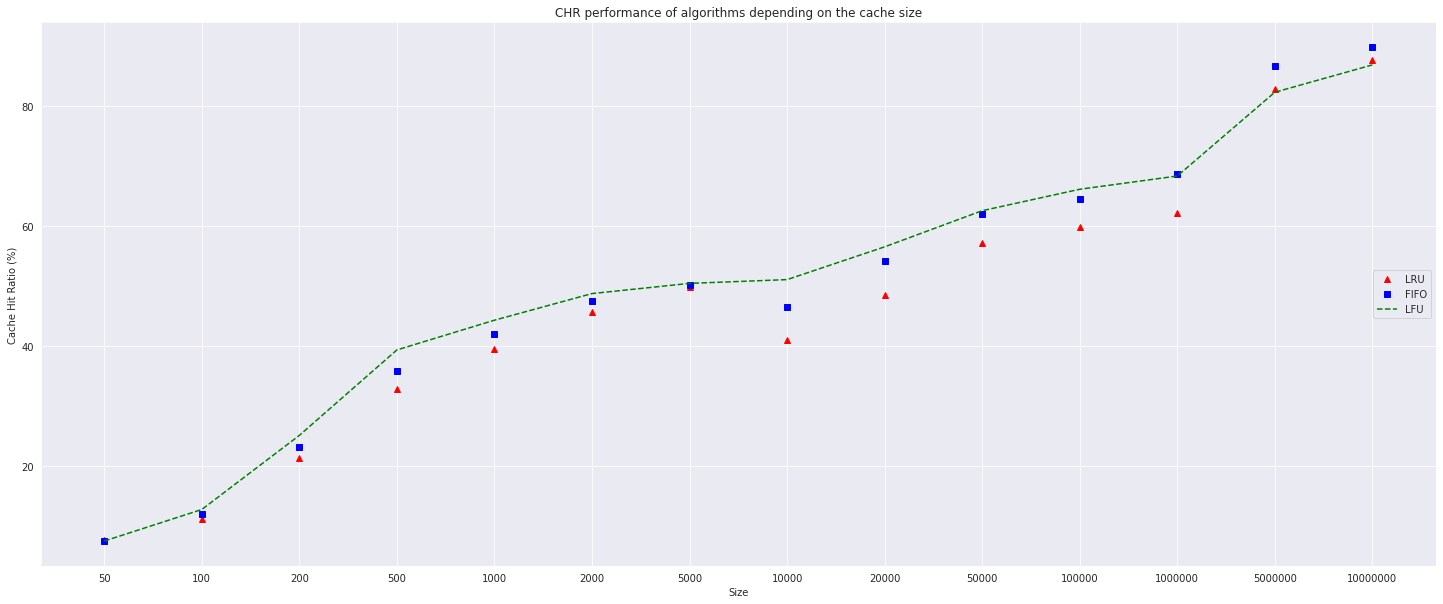

In [ ]:
fig, ax = plt.subplots(figsize=(25,10))
plt.plot(list(PFIFO_regular_df.index), list(PFIFO_regular_df['CHR']), 'r^', list(PFIFO_regular_df.index),list(PLRU_regular_df['CHR']), 'bs', list(PFIFO_regular_df.index), list(PLFU_regular_df['CHR']), 'g--')
ax.legend(['LRU', 'FIFO', 'LFU'], loc='center right')
ax.set_xlabel('Size [byte]')
ax.set_ylabel('Cache Hit Ratio [%]')
plt.title("CHR performance of algorithms depending on the cache size")
plt.savefig("baseline_size_comparison.png", bbox_inches = 'tight')
plt.show()

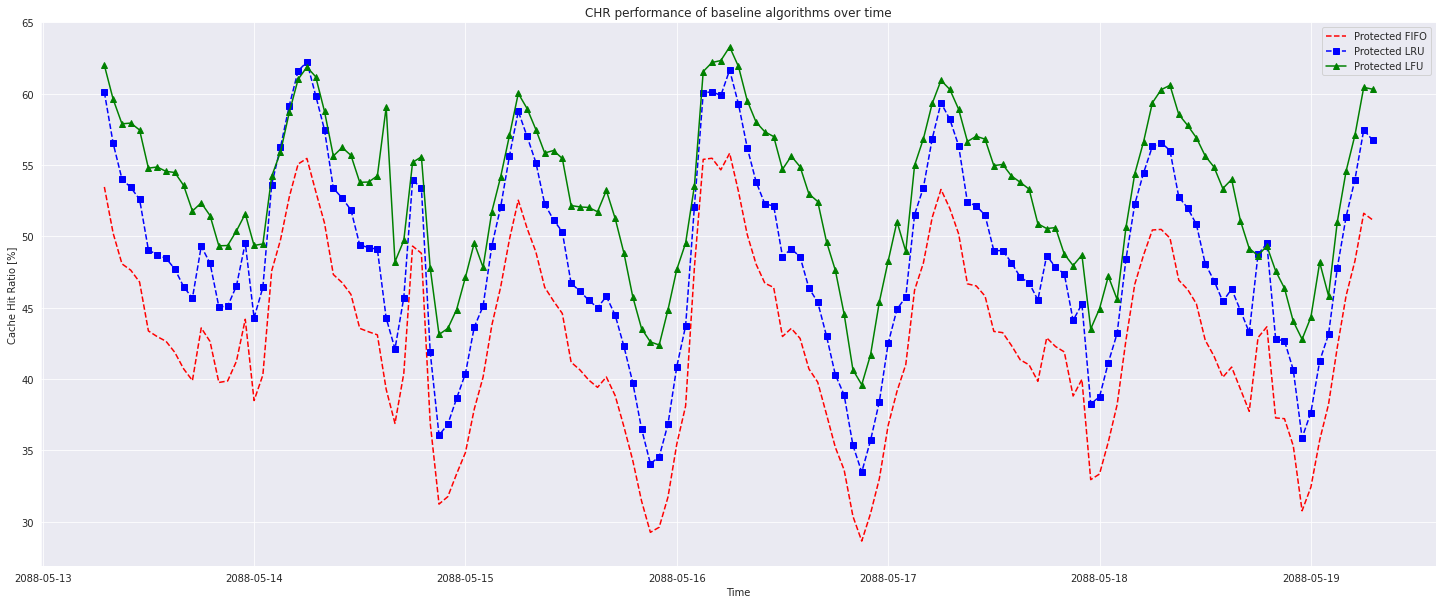

In [50]:
df_time_PFIFO = pd.read_csv("./results/CHR_PFIFO_10000_time.csv")
df_time_PLRU = pd.read_csv("./results/CHR_PLRU_10000_time.csv")
df_time_PLFU = pd.read_csv("./results/CHR_PLFU_10000_time.csv")

df_time_PFIFO["Time"] = pd.to_datetime(df_time_PFIFO["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PLRU["Time"] = pd.to_datetime(df_time_PLRU["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PLFU["Time"] = pd.to_datetime(df_time_PLFU["Time"], format="%Y-%m-%dT%H:%M:%S.%f")

df_time_PFIFO = df_time_PFIFO.resample('60Min', on='Time').mean()
df_time_PLRU = df_time_PLRU.resample('60Min', on='Time').mean()
df_time_PLFU = df_time_PLFU.resample('60Min', on='Time').mean()


fig, ax = plt.subplots(figsize=(25,10))
plt.plot(list(df_time_PFIFO.index), list(df_time_PFIFO['CHR']), 'r--', list(df_time_PLRU.index), list(df_time_PLRU['CHR']), 'bs--', list(df_time_PLFU.index), list(df_time_PLFU['CHR']), 'g^-')
ax.legend(['Protected FIFO', 'Protected LRU', 'Protected LFU'])
ax.set_xlabel('Time')
ax.set_ylabel('Cache Hit Ratio [%]')
plt.title("CHR performance of baseline algorithms over time")
plt.savefig("baseline_time_comparison.png", bbox_inches = 'tight')
plt.show()

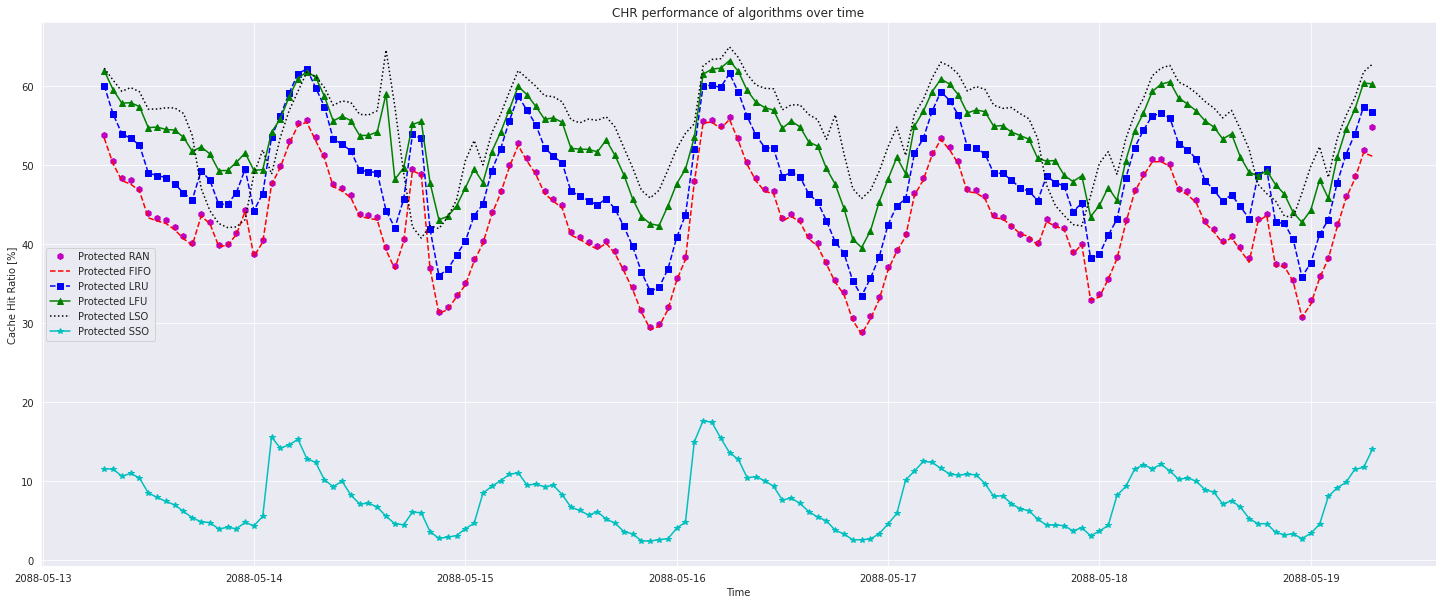

In [51]:
df_time_PRAN = pd.read_csv("./results/CHR_PRAN_10000_time.csv")
df_time_PFIFO = pd.read_csv("./results/CHR_PFIFO_10000_time.csv")
df_time_PLRU = pd.read_csv("./results/CHR_PLRU_10000_time.csv")
df_time_PLFU = pd.read_csv("./results/CHR_PLFU_10000_time.csv")
df_time_PLSO = pd.read_csv("./results/CHR_PLSO_10000_time.csv")
df_time_PSSO = pd.read_csv("./results/CHR_PSSO_10000_time.csv")

df_time_PRAN["Time"] = pd.to_datetime(df_time_PRAN["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PFIFO["Time"] = pd.to_datetime(df_time_PFIFO["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PLRU["Time"] = pd.to_datetime(df_time_PLRU["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PLFU["Time"] = pd.to_datetime(df_time_PLFU["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PLSO["Time"] = pd.to_datetime(df_time_PLSO["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PSSO["Time"] = pd.to_datetime(df_time_PSSO["Time"], format="%Y-%m-%dT%H:%M:%S.%f")

df_time_PRAN = df_time_PRAN.resample('60Min', on='Time').mean()
df_time_PFIFO = df_time_PFIFO.resample('60Min', on='Time').mean()
df_time_PLRU = df_time_PLRU.resample('60Min', on='Time').mean()
df_time_PLFU = df_time_PLFU.resample('60Min', on='Time').mean()
df_time_PLSO = df_time_PLSO.resample('60Min', on='Time').mean()
df_time_PSSO = df_time_PSSO.resample('60Min', on='Time').mean()


fig, ax = plt.subplots(figsize=(25,10))
plt.plot(list(df_time_PRAN.index), list(df_time_PRAN['CHR']), 'mh', list(df_time_PFIFO.index), list(df_time_PFIFO['CHR']), 'r--', list(df_time_PLRU.index), list(df_time_PLRU['CHR']), 'bs--', list(df_time_PLFU.index), list(df_time_PLFU['CHR']), 'g^-',  list(df_time_PLSO.index), list(df_time_PLSO['CHR']), 'k:', list(df_time_PSSO.index), list(df_time_PSSO['CHR']), 'c*-')
ax.legend(['Protected RAN', 'Protected FIFO', 'Protected LRU', 'Protected LFU', 'Protected LSO', 'Protected SSO'])
ax.set_xlabel('Time')
ax.set_ylabel('Cache Hit Ratio [%]')
plt.title("CHR performance of algorithms over time")
plt.savefig("time_comparison.png", bbox_inches = 'tight')
plt.show()

# Performance

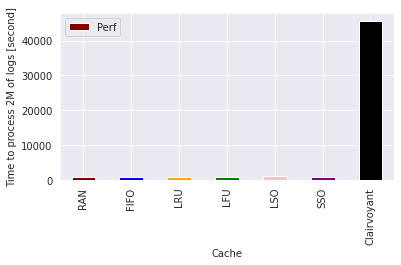

In [52]:
df_perf = pd.read_csv("./results/Perf.csv")
ax = df_perf.plot.bar(x='Cache', y='Perf', color=["Maroon", "Blue", "Orange", "Green", "Pink", "Purple", "Black"])
plt.ylabel("Time to process 2M of logs [second]")
plt.subplots_adjust(bottom=0.3)
plt.savefig("Perf_Clairvoyant.png")

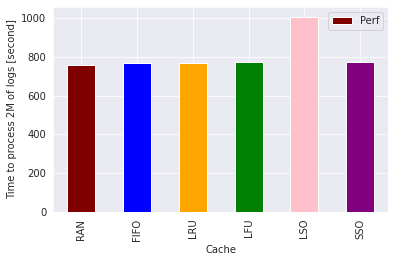

In [53]:
ax = df_perf.drop([6,6], axis=0).plot.bar(x='Cache', y='Perf', color=["Maroon", "Blue", "Orange", "Green", "Pink", "Purple"])
plt.ylabel("Time to process 2M of logs [second]")
plt.subplots_adjust(bottom=0.17)
plt.savefig("Perf_Comparison.png")

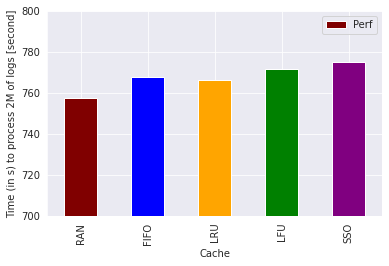

In [54]:
ax = df_perf.drop([4,4], axis=0).drop([6,6], axis=0).plot.bar(x='Cache', y='Perf', color=["Maroon", "Blue", "Orange", "Green", "Purple"])
plt.ylim(700, 800)
plt.ylabel("Time (in s) to process 2M of logs [second]")
plt.subplots_adjust(bottom=0.17)
plt.savefig("Perf_wo_LSO.png")

# Traffic from origin server

In [56]:
df_traffic_PRAN = pd.read_csv("./results/traffic_served_from_cache_PRAN_100000.csv").T
df_traffic_PRAN.rename(columns=df_traffic_PRAN.iloc[0], inplace=True)
df_traffic_PRAN.drop(df_traffic_PRAN.index[0], inplace = True)
df_traffic_PRAN["CacheType"] = "RAN"

df_traffic_PFIFO = pd.read_csv("./results/traffic_served_from_cache_PFIFO_100000.csv").T
df_traffic_PFIFO.rename(columns=df_traffic_PFIFO.iloc[0], inplace=True)
df_traffic_PFIFO.drop(df_traffic_PFIFO.index[0], inplace = True)
df_traffic_PFIFO["CacheType"] = "FIFO"

df_traffic_PLRU = pd.read_csv("./results/traffic_served_from_cache_PLRU_100000.csv").T
df_traffic_PLRU.rename(columns=df_traffic_PLRU.iloc[0], inplace=True)
df_traffic_PLRU.drop(df_traffic_PLRU.index[0], inplace = True)
df_traffic_PLRU["CacheType"] = "LRU"

df_traffic_PLFU = pd.read_csv("./results/traffic_served_from_cache_PLFU_100000.csv").T
df_traffic_PLFU.rename(columns=df_traffic_PLFU.iloc[0], inplace=True)
df_traffic_PLFU.drop(df_traffic_PLFU.index[0], inplace = True)
df_traffic_PLFU["CacheType"] = "LFU"

df_traffic_PLSO = pd.read_csv("./results/traffic_served_from_cache_PLSO_100000.csv").T
df_traffic_PLSO.rename(columns=df_traffic_PLSO.iloc[0], inplace=True)
df_traffic_PLSO.drop(df_traffic_PLSO.index[0], inplace = True)
df_traffic_PLSO["CacheType"] = "LSO"

df_traffic_PSSO = pd.read_csv("./results/traffic_served_from_cache_PSSO_100000.csv").T
df_traffic_PSSO.rename(columns=df_traffic_PSSO.iloc[0], inplace=True)
df_traffic_PSSO.drop(df_traffic_PSSO.index[0], inplace = True)
df_traffic_PSSO["CacheType"] = "SSO"

df_traffic = pd.concat([df_traffic_PRAN, df_traffic_PFIFO, df_traffic_PLRU, df_traffic_PLFU, df_traffic_PLSO, df_traffic_PSSO]).reset_index(drop=True)
df_traffic["Served from the cache"] = df_traffic["Status.HIT"]
df_traffic["Served from the origin server"] = df_traffic["Status.MISS"]+df_traffic["Status.PASS"]
df_traffic.drop(df_traffic.iloc[:, 0:3], inplace = True, axis = 1)

In [ ]:
df_traffic

CacheType Served from the cache Served from the origin server
0       RAN           12315411008                   27266252494
1      FIFO           12276913601                   27304749901
2       LRU           13707344543                   25874318959
3       LFU           14968982086                   24612681416
4       LSO           12667837322                   26913826180
5       SSO             995213651                   38586449851

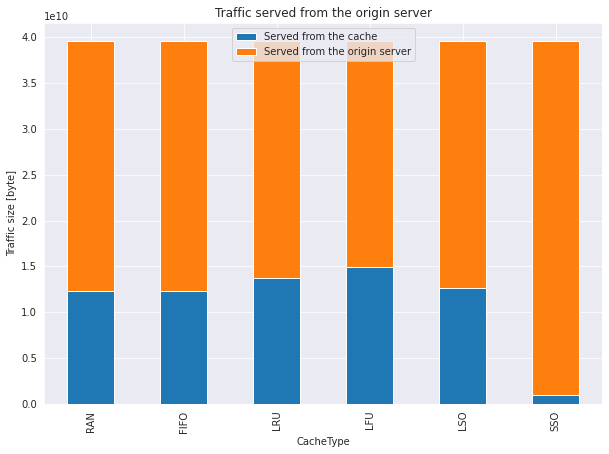

In [57]:
df_traffic.plot(x='CacheType', kind='bar', stacked=True,
        title='Traffic served from the origin server', figsize=(10,7)).legend(loc='upper center')
plt.ylabel('Traffic size [byte]')
plt.savefig("Traffic.png")

# Clairvoyant

In [59]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md
import datetime as dt
import numpy as np
from pandas.api.types import CategoricalDtype
import io
import copy
import datetime
import glob

uploaded = files.upload()
sns.set_style("darkgrid")

Saving CHR_Clairvoyant_final.csv to CHR_Clairvoyant_final.csv
Saving CHR_Clairvoyant_regular.csv to CHR_Clairvoyant_regular.csv
Saving CHR_Clairvoyant_time.csv to CHR_Clairvoyant_time.csv
Saving CHR_protected_Clairvoyant_movies.csv to CHR_protected_Clairvoyant_movies.csv
Saving CHR_protected_FIFO_final.csv to CHR_protected_FIFO_final.csv
Saving CHR_protected_FIFO_movies.csv to CHR_protected_FIFO_movies.csv
Saving CHR_protected_FIFO_regular.csv to CHR_protected_FIFO_regular.csv
Saving CHR_protected_FIFO_time.csv to CHR_protected_FIFO_time.csv
Saving CHR_protected_LFU_final.csv to CHR_protected_LFU_final.csv
Saving CHR_protected_LFU_movies.csv to CHR_protected_LFU_movies.csv
Saving CHR_protected_LFU_regular.csv to CHR_protected_LFU_regular.csv
Saving CHR_protected_LFU_time.csv to CHR_protected_LFU_time.csv
Saving CHR_protected_LRU_final.csv to CHR_protected_LRU_final.csv
Saving CHR_protected_LRU_movies.csv to CHR_protected_LRU_movies.csv
Saving CHR_protected_LRU_regular.csv to CHR_protec

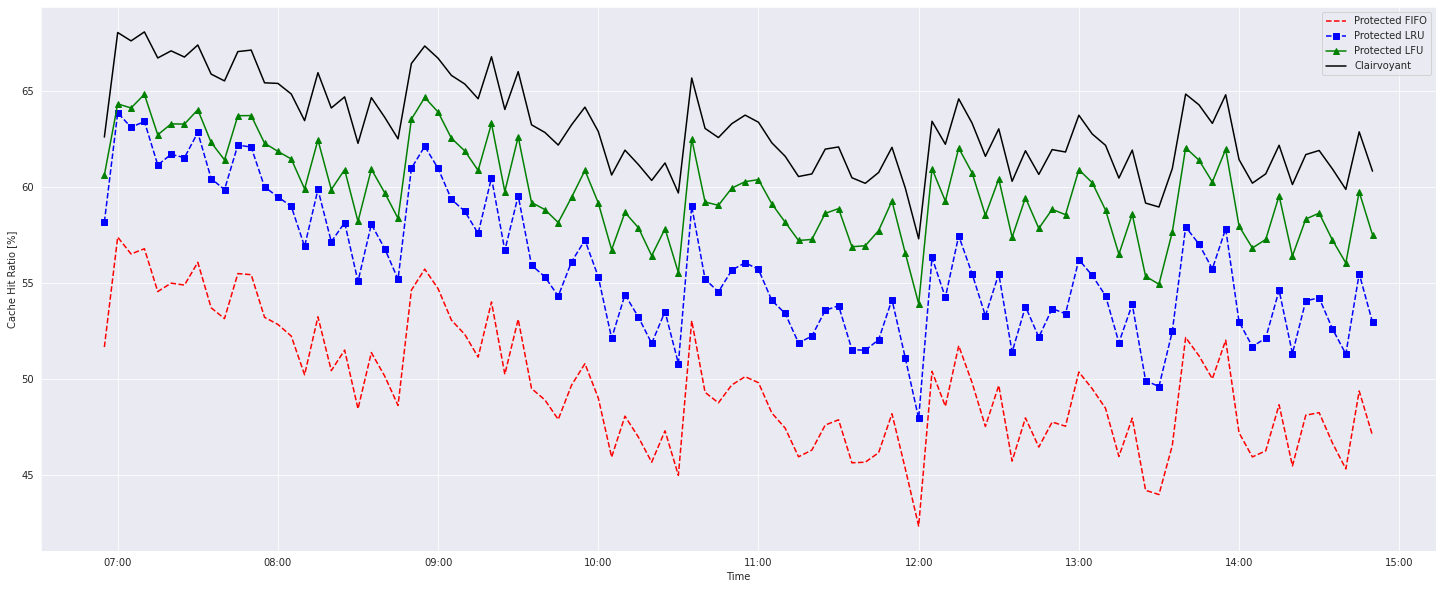

In [60]:
df_time_PRAN = pd.read_csv("./CHR_protected_RAN_time.csv")
df_time_PFIFO = pd.read_csv("./CHR_protected_FIFO_time.csv")
df_time_PLRU = pd.read_csv("./CHR_protected_LRU_time.csv")
df_time_PLFU = pd.read_csv("./CHR_protected_LFU_time.csv")
df_time_PLSO = pd.read_csv("./CHR_protected_LSO_time.csv")
df_time_PSSO = pd.read_csv("./CHR_protected_SSO_time.csv")
df_time_Clairvoyant = pd.read_csv("./CHR_Clairvoyant_time.csv")

df_time_PRAN["Time"] = pd.to_datetime(df_time_PRAN["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PFIFO["Time"] = pd.to_datetime(df_time_PFIFO["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PLRU["Time"] = pd.to_datetime(df_time_PLRU["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PLFU["Time"] = pd.to_datetime(df_time_PLFU["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PLSO["Time"] = pd.to_datetime(df_time_PLSO["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_PSSO["Time"] = pd.to_datetime(df_time_PSSO["Time"], format="%Y-%m-%dT%H:%M:%S.%f")
df_time_Clairvoyant["Time"] = pd.to_datetime(df_time_Clairvoyant["Time"], format="%Y-%m-%dT%H:%M:%S.%f")

df_time_PRAN = df_time_PRAN.resample('5Min', on='Time').mean()
df_time_PFIFO = df_time_PFIFO.resample('5Min', on='Time').mean()
df_time_PLRU = df_time_PLRU.resample('5Min', on='Time').mean()
df_time_PLFU = df_time_PLFU.resample('5Min', on='Time').mean()
df_time_PLSO = df_time_PLSO.resample('5Min', on='Time').mean()
df_time_PSSO = df_time_PSSO.resample('5Min', on='Time').mean()
df_time_Clairvoyant = df_time_Clairvoyant.resample('5Min', on='Time').mean()


fig, ax = plt.subplots(figsize=(25,10))
plt.plot(list(df_time_PFIFO.index), list(df_time_PFIFO['CHR']), 'r--', list(df_time_PLRU.index), list(df_time_PLRU['CHR']), 'bs--', list(df_time_PLFU.index), list(df_time_PLFU['CHR']), 'g^-',  list(df_time_Clairvoyant.index), list(df_time_Clairvoyant['CHR']), 'k-')
ax.legend(['Protected FIFO', 'Protected LRU', 'Protected LFU', 'Clairvoyant'])
ax.set_xlabel('Time')
ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
ax.set_ylabel('Cache Hit Ratio [%]')
plt.savefig("clairvoyant_comparison.png", bbox_inches = 'tight')
plt.show()

In [61]:
# RAN
file_list = glob.glob("./*protected_RAN*final.csv")
PRAN_regular_df = pd.DataFrame()
for csv_name in file_list:
  data = pd.read_csv(csv_name)
  PRAN_regular_df = pd.DataFrame(data)
  PRAN_regular_df["Cache"] = "RAN"

normalized_PRAN_df = copy.deepcopy(PRAN_regular_df)
normalized_PRAN_df["Hit"] = normalized_PRAN_df["Hit"] / normalized_PRAN_df["Total"] *100
normalized_PRAN_df["Miss"] = normalized_PRAN_df["Miss"] / normalized_PRAN_df["Total"] *100
normalized_PRAN_df["Pass"] = normalized_PRAN_df["Pass"] / normalized_PRAN_df["Total"] *100

# FIFO
file_list = glob.glob("./*protected_FIFO*final.csv")
PFIFO_regular_df = pd.DataFrame()
for csv_name in file_list:
  data = pd.read_csv(csv_name)
  PFIFO_regular_df = pd.DataFrame(data)
  PFIFO_regular_df["Cache"] = "FIFO"

normalized_PFIFO_df = copy.deepcopy(PFIFO_regular_df)
normalized_PFIFO_df["Hit"] = normalized_PFIFO_df["Hit"] / normalized_PFIFO_df["Total"] *100
normalized_PFIFO_df["Miss"] = normalized_PFIFO_df["Miss"] / normalized_PFIFO_df["Total"] *100
normalized_PFIFO_df["Pass"] = normalized_PFIFO_df["Pass"] / normalized_PFIFO_df["Total"] *100

# LRU
file_list = glob.glob("./*protected_LRU*final.csv")
PLRU_regular_df = pd.DataFrame()
for csv_name in file_list:
  data = pd.read_csv(csv_name)
  PLRU_regular_df = pd.DataFrame(data)
  PLRU_regular_df["Cache"] = "LRU"

normalized_PLRU_df = copy.deepcopy(PLRU_regular_df)
normalized_PLRU_df["Hit"] = normalized_PLRU_df["Hit"] / normalized_PLRU_df["Total"] *100
normalized_PLRU_df["Miss"] = normalized_PLRU_df["Miss"] / normalized_PLRU_df["Total"] *100
normalized_PLRU_df["Pass"] = normalized_PLRU_df["Pass"] / normalized_PLRU_df["Total"] *100

# LFU
file_list = glob.glob("./*protected_LFU*final.csv")
PLFU_regular_df = pd.DataFrame()
for csv_name in file_list:
  data = pd.read_csv(csv_name)
  PLFU_regular_df = pd.DataFrame(data)
  PLFU_regular_df["Cache"] = "LFU"

normalized_PLFU_df = copy.deepcopy(PLFU_regular_df)
normalized_PLFU_df["Hit"] = normalized_PLFU_df["Hit"] / normalized_PLFU_df["Total"] *100
normalized_PLFU_df["Miss"] = normalized_PLFU_df["Miss"] / normalized_PLFU_df["Total"] *100
normalized_PLFU_df["Pass"] = normalized_PLFU_df["Pass"] / normalized_PLFU_df["Total"] *100

# LSO
file_list = glob.glob("./*protected_LSO*final.csv")
PLSO_regular_df = pd.DataFrame()
for csv_name in file_list:
  data = pd.read_csv(csv_name)
  PLSO_regular_df = pd.DataFrame(data)
  PLSO_regular_df["Cache"] = "LSO"

normalized_PLSO_df = copy.deepcopy(PLSO_regular_df)
normalized_PLSO_df["Hit"] = normalized_PLSO_df["Hit"] / normalized_PLSO_df["Total"] *100
normalized_PLSO_df["Miss"] = normalized_PLSO_df["Miss"] / normalized_PLSO_df["Total"] *100
normalized_PLSO_df["Pass"] = normalized_PLSO_df["Pass"] / normalized_PLSO_df["Total"] *100

# SSO
file_list = glob.glob("./*protected_SSO*final.csv")
PSSO_regular_df = pd.DataFrame()
for csv_name in file_list:
  data = pd.read_csv(csv_name)
  PSSO_regular_df = pd.DataFrame(data)
  PSSO_regular_df["Cache"] = "SSO"

normalized_PSSO_df = copy.deepcopy(PSSO_regular_df)
normalized_PSSO_df["Hit"] = normalized_PSSO_df["Hit"] / normalized_PSSO_df["Total"] *100
normalized_PSSO_df["Miss"] = normalized_PSSO_df["Miss"] / normalized_PSSO_df["Total"] *100
normalized_PSSO_df["Pass"] = normalized_PSSO_df["Pass"] / normalized_PSSO_df["Total"] *100

# Clairvoyant
file_list = glob.glob("./*Clairvoyant*final.csv")
Clairvoyant_regular_df = pd.DataFrame()
for csv_name in file_list:
  data = pd.read_csv(csv_name)
  Clairvoyant_regular_df = pd.DataFrame(data)
  Clairvoyant_regular_df["Cache"] = "Clairvoyant"

normalized_Clairvoyant_df = copy.deepcopy(Clairvoyant_regular_df)
normalized_Clairvoyant_df["Hit"] = normalized_Clairvoyant_df["Hit"] / normalized_Clairvoyant_df["Total"] *100
normalized_Clairvoyant_df["Miss"] = normalized_Clairvoyant_df["Miss"] / normalized_Clairvoyant_df["Total"] *100
normalized_Clairvoyant_df["Pass"] = normalized_Clairvoyant_df["Pass"] / normalized_Clairvoyant_df["Total"] *100

regular_df = pd.concat([PRAN_regular_df, PFIFO_regular_df, PLRU_regular_df, PLFU_regular_df, normalized_PLSO_df, Clairvoyant_regular_df],axis=0)
normalized_regular_df = pd.concat([normalized_PRAN_df, normalized_PFIFO_df, normalized_PLRU_df, normalized_PLFU_df, normalized_PLSO_df,  normalized_Clairvoyant_df],axis=0)

In [ ]:
regular_df

Total        CHR       Hit     Miss     Pass        Cache
0  28340000  49.675131  14077932  9050160  5211908        PFIFO
0  28340000  55.810300  15816639  7311406  5211955         PLRU
0  28340000  59.746895  16932270  6195548  5212182         PLFU
0  28340000  63.126775  17890128  5238560  5211312  Clairvoyant

In [ ]:
normalized_regular_df

Total        CHR        Hit       Miss       Pass        Cache
0  28340000  50.025371  50.025371  31.583987  18.390642         PRAN
0  28340000  49.675131  49.675131  31.934227  18.390642        PFIFO
0  28340000  55.810300  55.810300  25.798892  18.390808         PLRU
0  28340000  59.746895  59.746895  21.861496  18.391609         PLFU
0  28340000  58.995603  58.995603  22.649545  18.354852         PLSO
0  28340000   5.975187   5.975187  75.632844  18.391969         PSSO
0  28340000  63.126775  63.126775  18.484686  18.388539  Clairvoyant

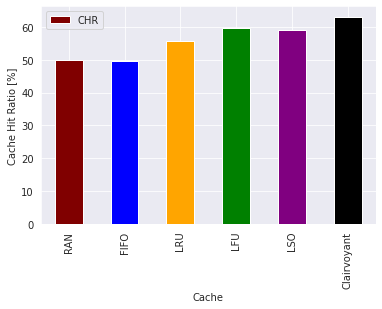

In [62]:
ax = regular_df.plot.bar(x='Cache', y='CHR', color=["Maroon", "Blue", "Orange", "Green", "Purple", "Black"])
ax.set_ylabel('Cache Hit Ratio [%]')
plt.savefig("clairvoyant_CHR.png", bbox_inches = 'tight')